<a href="https://colab.research.google.com/github/NIKITASARDE12/EDA-HOTEL-BOOKING-ANALYSIS/blob/main/Capstone_Hotel_Analysis_EDA_nikita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis

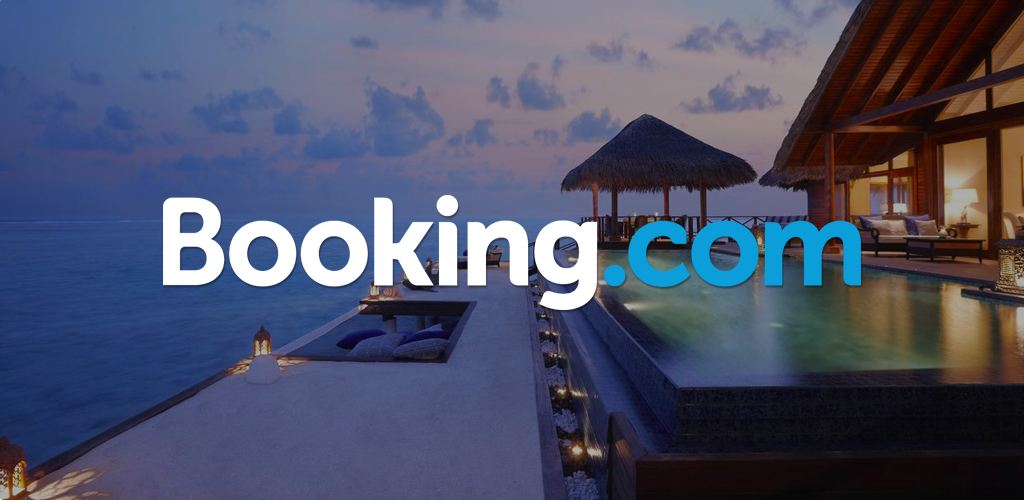

##### **Project Type**    - EDA
##### **Contribution**    - Individual

#### **Dataset_Link** :
https://drive.google.com/file/d/1RQZFrADGApHEP_2-NaHVQ8D1tvs0ykBO/view?usp=sharing

#### **Github_Link** :
https://github.com/sanchita98/Hotel_Booking_Analysis_EDA/blob/main/Hotel_booking_eda_sanchita_project.py

# **Project Summary**

**Overview**:

**Understanding Booking Behavior**: Analyze peak booking times, seasonal trends, and preferred booking durations (stays_in_weekend_nights, stays_in_week_nights).

**Cancellation Analysis**: Investigate factors influencing booking cancellations (is_canceled), including lead_time, deposit_type, and historical cancellation patterns.

**Guest Demographics and Preferences**: Profile guest demographics (adults, children, babies, country) and preferences (customer_type, meal), identifying key market segments and their booking behaviors.

**Revenue Management**: Evaluate pricing strategies through adr (Average Daily Rate) analysis, considering booking_changes and room type dynamics (reserved_room_type, assigned_room_type).

**Operational Efficiency**: Assess days_in_waiting_list impact on booking fulfillment, optimize required_car_parking_spaces, and manage total_of_special_requests to enhance service delivery.

**Market Segmentation and Distribution Channels**: Classify bookings by market_segment and distribution_channel, optimizing marketing efforts and distribution strategies (agent, company).



# 1. Know Your Data

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [ ]:
data = df.copy()

### Dataset Rows & Columns count


In [ ]:
# Dataset Rows & Columns count
data.shape #having approx 1.2 lakh rows and 32 columns

(119390, 32)

###Dataset First View

In [ ]:
# To sees the first views of the dataset
data.sample(5)  #selected values randomly

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
45797,City Hotel,1,98,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,84.00,0,0,Canceled,2015-09-14
7597,Resort Hotel,1,100,2016,August,34,16,0,2,2,...,No Deposit,240.0,NaN,0,Transient-Party,195.00,0,0,Canceled,2016-07-31
72492,City Hotel,1,276,2017,July,30,29,2,1,3,...,No Deposit,9.0,NaN,0,Transient,156.60,0,3,Canceled,2016-11-12
12844,Resort Hotel,1,20,2017,July,29,19,2,9,2,...,No Deposit,240.0,NaN,0,Transient,232.91,0,1,Canceled,2017-07-06
37266,Resort Hotel,0,27,2017,June,23,10,1,1,2,...,No Deposit,240.0,NaN,0,Transient,186.00,1,3,Check-Out,2017-06-12


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Calculating the counts for each relevant columns
print(data.hotel.value_counts())
print()
print(data.meal.value_counts())
print()
print(data.market_segment.value_counts())
print()
print(data.distribution_channel.value_counts())
print()
print(data.deposit_type.value_counts())
print()
print(data.reservation_status.value_counts())

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64


### Duplicate Values



In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

31994

In [ ]:
# Drop the Duplicate values / rows
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum().sort_values(ascending = False)

,0
company,82137
agent,12193
country,452
children,4
reserved_room_type,0
assigned_room_type,0
booking_changes,0
deposit_type,0
hotel,0
previous_cancellations,0


In [ ]:
null_columns = data.columns[data.isnull().any()]
null_counts = data[null_columns].isnull().sum().sort_values(ascending = False)
print(null_counts)


company     82137
agent       12193
country       452
children        4
dtype: int64


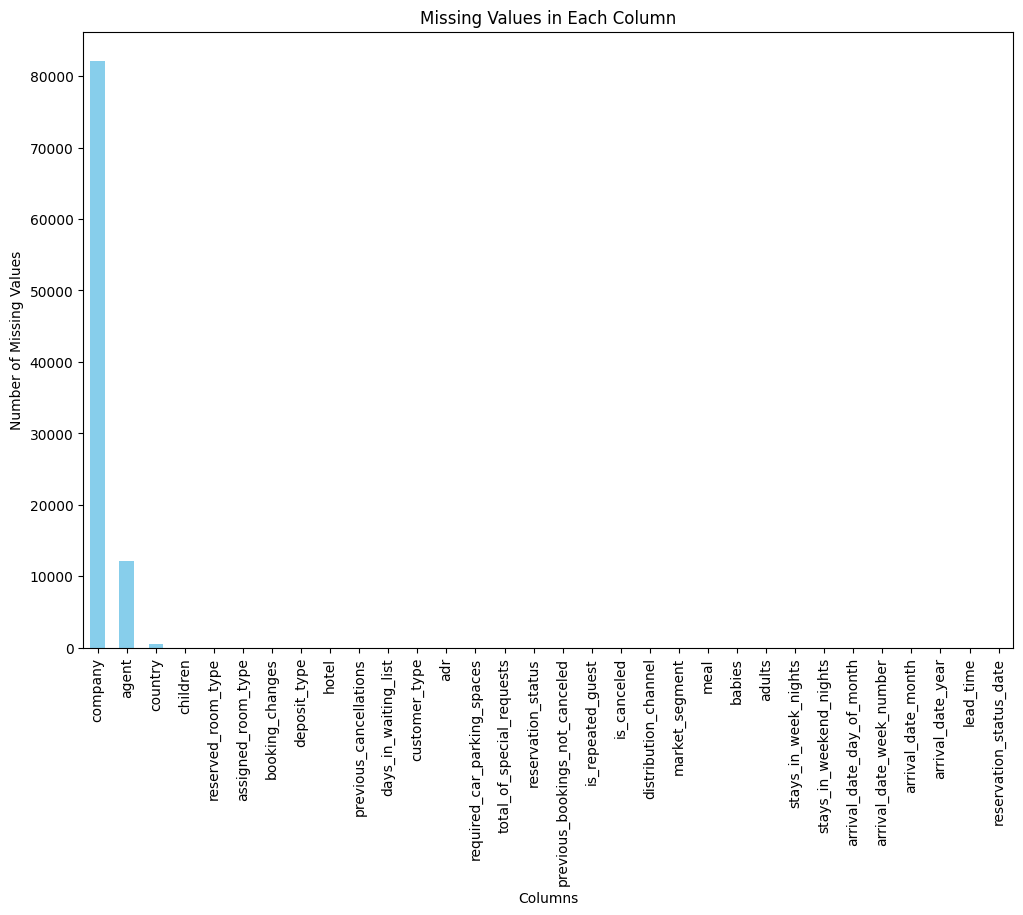

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting barchart

plt.figure(figsize=(12, 8))
data.isnull().sum().sort_values(ascending = False).plot(kind='bar', color = 'skyblue')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.title('Missing Values in Each Column')
plt.show()


# What did you know about your dataset?

## **Booking Statistics:**
- **City Hotel:** 79,330 bookings
- **Resort Hotel:** 40,060 bookings
  - Significantly more bookings for City Hotels than Resort Hotels.

## **Meal Preferences:**
- **BB (Bed & Breakfast):** 92,310 bookings
- **HB (Half Board):** 14,463 bookings
- **SC (Self Catering):** 10,650 bookings
- **Undefined:** 1,169 bookings
- **FB (Full Board):** 798 bookings
  - Dominant preference for Bed & Breakfast (BB).
  - Undefined values and Full Board (FB) less common.

## **Market Segment:**
- **Online TA:** 56,477 bookings
- **Offline TA/TO:** 24,219 bookings
- **Groups:** 19,811 bookings
- **Direct:** 12,606 bookings
- **Corporate:** 5,295 bookings
- **Complementary:** 743 bookings
- **Aviation:** 237 bookings
- **Undefined:** 2 bookings
  - Majority of bookings through Online Travel Agencies (Online TA).
  - Followed by Offline TA/TO and Groups.

## **Distribution Channel:**
- **TA/TO:** 97,870 bookings
- **Direct:** 14,645 bookings
- **Corporate:** 6,677 bookings
- **GDS:** 193 bookings
- **Undefined:** 5 bookings
  - Predominant use of TA/TO as the distribution channel.

## **Deposit Type:**
- **No Deposit:** 104,641 bookings
- **Non-Refundable:** 14,587 bookings
- **Refundable:** 162 bookings
  - Majority of bookings do not require a deposit.

## **Reservation Status:**
- **Check-Out:** 75,166 bookings
- **Canceled:** 43,017 bookings
- **No-Show:** 1,207 bookings
  - Significant check-out, fewer cancellations, and No-Shows.

## **Key Insights from the Dataset:**
1. **Booking Patterns:**
   - Identify trends in lead time, arrival dates, and deposit types.

2. **Guest Demographics:**
   - Analyze the number of guests, country of origin, market segment, and customer type.

3. **Room and Meal Preferences:**
   - Understand reserved and assigned room types, meal selections.

4. **Reservation Status Analysis:**
   - Explore reasons behind cancellations, inform CRM strategies.

5. **Pricing and Revenue Insights:**
   - Examine daily rates, waiting list duration, and deposit impact on revenue.



# **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
list(data.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Dataset Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


In [ ]:
# Dataset Describe
data.describe(include = 'all').T #include all columns i.e. categorical data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,87396,2,City Hotel,53428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,87396.0,NaN,NaN,NaN,0.274898,0.446466,0.0,0.0,0.0,1.0,1.0
lead_time,87396.0,NaN,NaN,NaN,79.891368,86.052325,0.0,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,NaN,NaN,NaN,2016.210296,0.686102,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,87396,12,August,11257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,87396.0,NaN,NaN,NaN,26.838334,13.674572,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,NaN,NaN,NaN,15.815541,8.835146,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,NaN,NaN,NaN,1.005263,1.031921,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,NaN,NaN,NaN,2.625395,2.053584,0.0,1.0,2.0,4.0,50.0
adults,87396.0,NaN,NaN,NaN,1.875795,0.6265,0.0,2.0,2.0,2.0,55.0


# Variable Description

**hotel**: Type of hotel (e.g., Resort Hotel or City Hotel).

**is_canceled**: Binary variable indicating if the booking was canceled (1) or not (0).

**lead_time**: Number of days between the booking date and the arrival date.

**arrival_date_year**: Year of arrival date.

**arrival_date_month**: Month of arrival date.

**arrival_date_week_number**: Week number of arrival date.

**arrival_date_day_of_month**: Day of arrival date.

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

**adults**: Number of adults.

**children**: Number of children.

**babies**: Number of babies.

**meal**: Type of meal booked. Categories typically include Bed & Breakfast Half Board (Breakfast and one other meal), Full Board (Breakfast, lunch, and dinner), and Undefined/SC (no meal).

**country**: Country of origin of the guest.

**market_segment**: Market segment designation (e.g., Online Travel Agents, Offline Travel Agents, Direct).

**distribution_channel**: Booking distribution channel (e.g., Direct, Corporate, Travel Agent).

**is_repeated_guest**: Binary variable indicating if the booking was from a repeated guest (1) or not (0).

**previous_cancellations**: Number of previous bookings that were canceled by the guest prior to the current booking.

**previous_bookings_not_canceled**: Number of previous bookings that were not canceled by the guest prior to the current booking.

**reserved_room_type**: Code for the type of room reserved by the guest.

**assigned_room_type**: Code for the type of room assigned to the booking.

**booking_changes**: Number of changes or modifications made to the booking before arrival or cancellation.

**deposit_type**: Type of deposit made (e.g., No Deposit, Non Refund, Refundable).

**agent**: ID of the travel agency that made the booking.

**company**: ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the guest.

**customer_type**: Type of booking (e.g., Transient, Contract, Group).

**adr**: Average Daily Rate (average revenue per room per day).

**required_car_parking_spaces**: Number of car parking spaces required by the guest.

**total_of_special_requests**: Number of special requests made by the guest (e.g., extra beds, early check-in).

**reservation_status**: Reservation last status (Canceled, Check-Out, No-Show).

**reservation_status_date**: Date at which the last status was set.


### Check Unique Values for each variable.

In [ ]:
for column in data.columns:
    print(f"Unique values for {column}:")
    print(data[column].unique())
    print("\n")

Unique values for hotel:
['Resort Hotel' 'City Hotel']


Unique values for is_canceled:
[0 1]


Unique values for lead_time:
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print(i,':' ,data[i].nunique())


hotel : 2
is_canceled : 2
lead_time : 479
arrival_date_year : 3
arrival_date_month : 12
arrival_date_week_number : 53
arrival_date_day_of_month : 31
stays_in_weekend_nights : 17
stays_in_week_nights : 35
adults : 14
children : 5
babies : 5
meal : 5
country : 177
market_segment : 8
distribution_channel : 5
is_repeated_guest : 2
previous_cancellations : 15
previous_bookings_not_canceled : 73
reserved_room_type : 10
assigned_room_type : 12
booking_changes : 21
deposit_type : 3
agent : 333
company : 352
days_in_waiting_list : 128
customer_type : 4
adr : 8879
required_car_parking_spaces : 5
total_of_special_requests : 6
reservation_status : 3
reservation_status_date : 926


# 3. ***Data Wrangling***


Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

Steps used for data Cleaning:


Remove duplicate rows.

Handling missing values.

Adding important columns.


### info to each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

### Converting the reservation_status_date into the datetime

In [ ]:
# Write your code to make your dataset analysis ready.
import datetime

# converting data['reservation_status_date'] column to datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'] , errors='coerce')


In [ ]:
data['reservation_status_date'].head(1)

,reservation_status_date
0,2015-07-01


### Adding important columns

In [ ]:
# Creating new column as total_guest

data['total_guest'] = data['adults'] + data['children'] + data['babies']

In [ ]:
# Creating new column as total_duration

data['total_duration'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

### Dropping the irrelevant columns

In [ ]:
# We are dropping the 'adults', 'children', and 'babies' columns because we have already created a new column called
# 'total_guest' where we aggregate the total number of family members.

data.drop(['adults', 'children', 'babies'], axis = 1, inplace = True)

In [ ]:
# Droping the 'company' columns because it has lot of null values

data.drop(['company'], axis = 1, inplace = True)

In [ ]:
# Dropping rows where the total_guest column is less than or equal to 0

data.drop(data[data['total_guest']  <= 0].index, axis = 0, inplace= True)


### Converting the country code to country name using pycountry library

In [ ]:
# installing pycountry library for converting country code to country name

!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.9 MB/s eta 0:00:00


In [ ]:
import pycountry

# Function to get the country name from the alpha-3 country code
def get_country_name(code):
    try:
        # Fetch the country object using the alpha-3 code
        country = pycountry.countries.get(alpha_3=code)
        return country.name  # Return the country name
    except:
        return 'Unknown'  # Handle cases where the country code is not found

# Apply the get_country_name function to the 'country' column
# and create a new column 'Country_Name' with the corresponding country names
data['Country_Name'] = data['country'].apply(get_country_name)


In [ ]:
data['Country_Name'].sample(1)

,Country_Name
67296,China


In [ ]:
# Droping the 'country' columns because we already created a new column Country_Name using 'country' code

data.drop(['country'], axis = 1, inplace = True)

In [ ]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
meal,0


### Handling the missing values

In [ ]:
# HANDLING MISSING VALUES

data['agent'].fillna(round(data['agent'].mean(),2),inplace=True)

<ipython-input-38-ee0f418ab346>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['agent'].fillna(round(data['agent'].mean(),2),inplace=True)


In [ ]:
data['agent']

,agent
0,94.2
1,94.2
2,94.2
3,304.0
4,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


In [ ]:
# HANDLING MISSING VALUES

data['agent'].fillna(round(data['agent'].mean(),2),inplace=True)

In [ ]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
meal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   meal                            87230 non-null  object        
 10  market_segment                  87230 non-null  object        
 11  distri

In [ ]:
data['agent'].isnull().sum()

0

In [ ]:
data.shape

(87230, 30)

### Checking for outlier

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

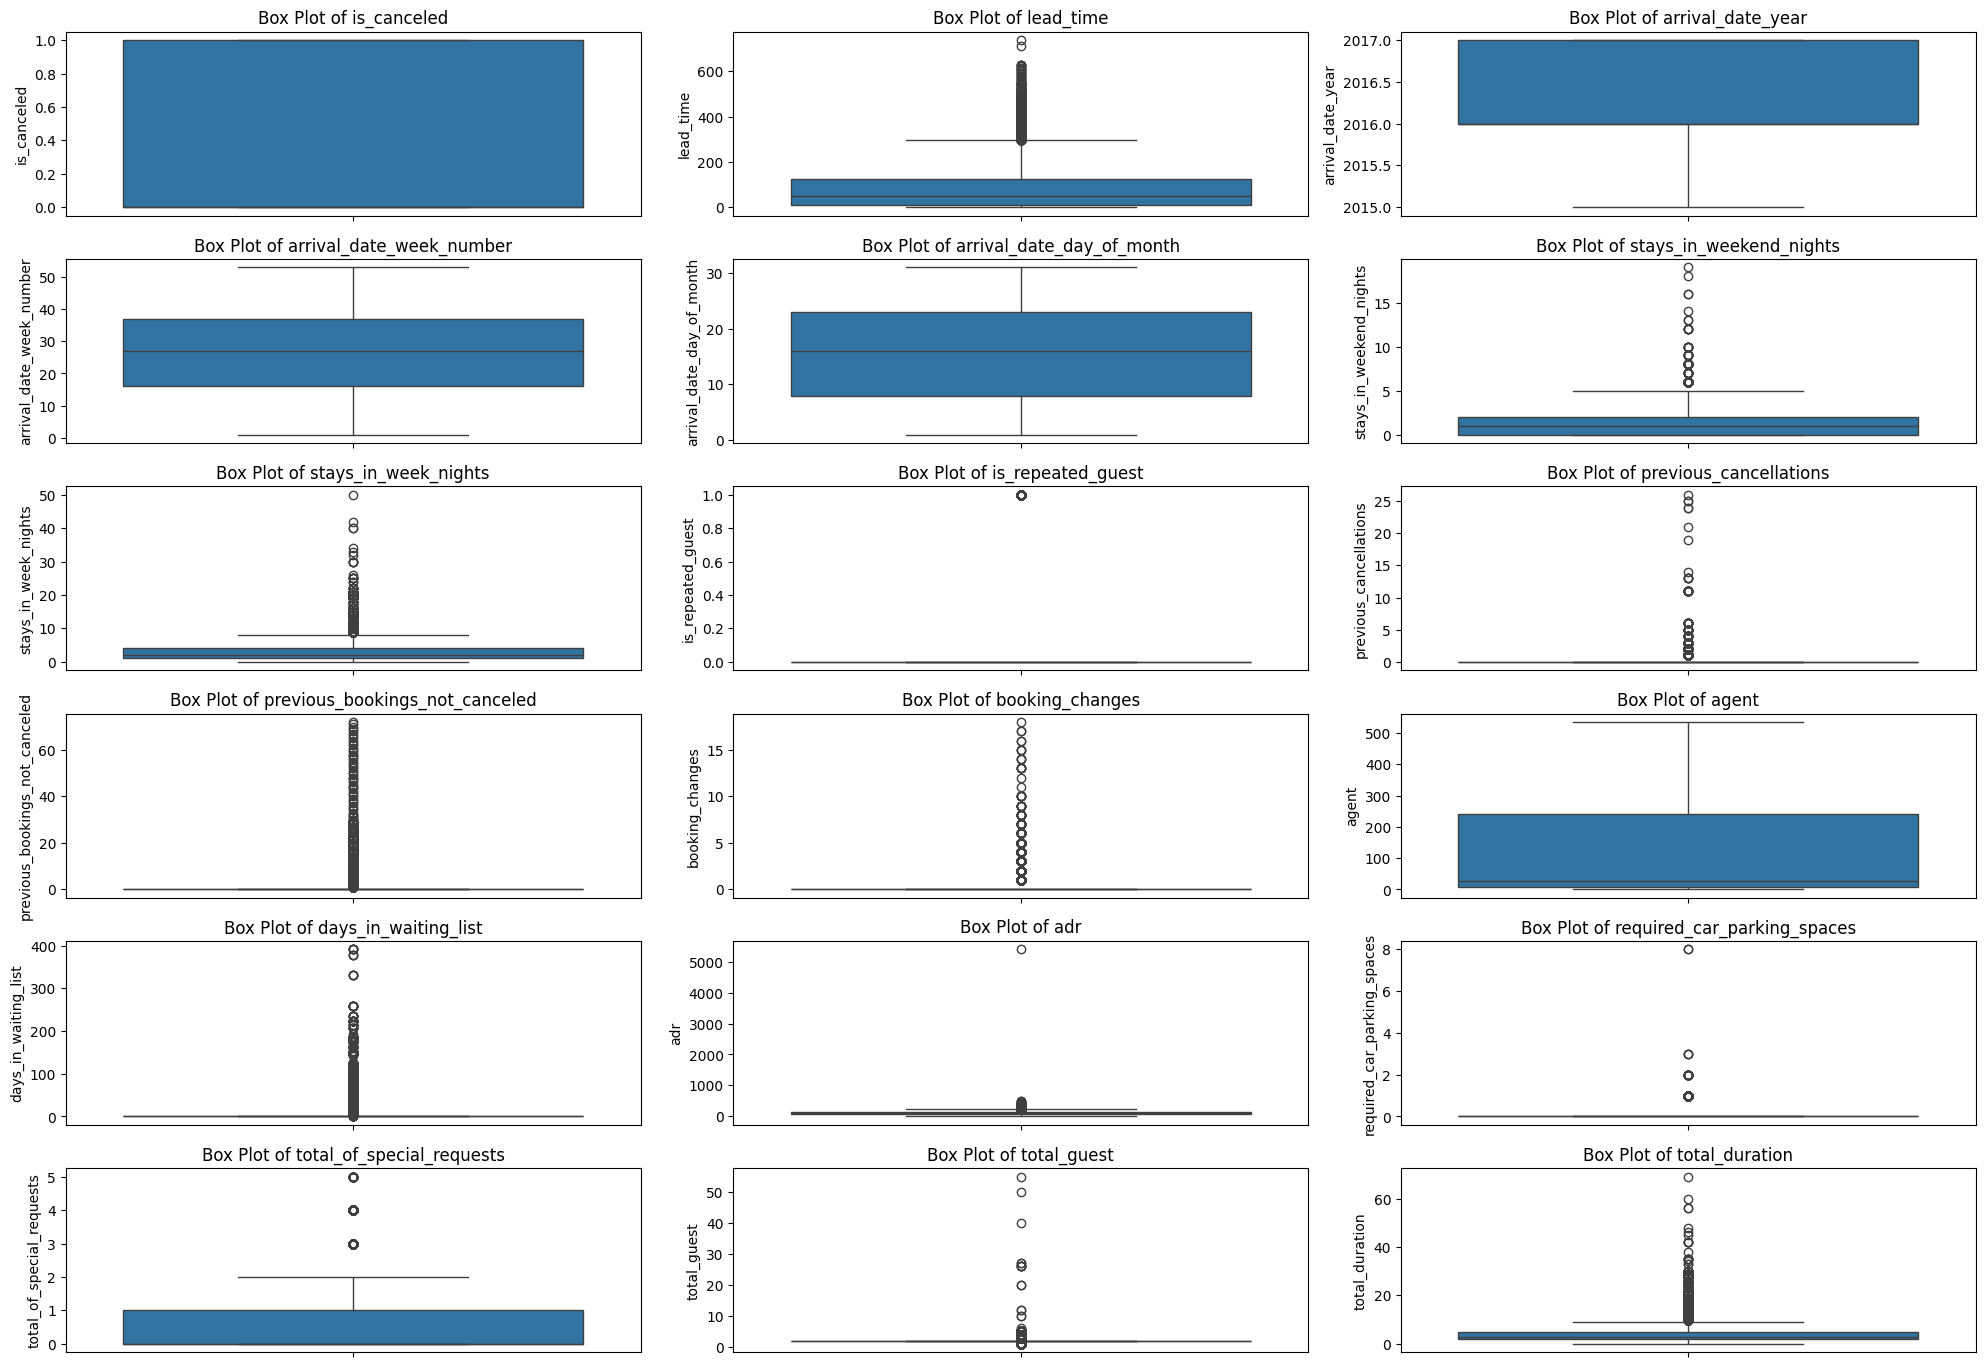

In [ ]:
# Plot box plots for each numerical column
# Select only the numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 16))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# What all manipulations have you done and insights you found?





1.Dropping the 'company' Column:

 Removed the 'company' column from the DataFrame (data) as it contained more than 90% missing values. This decision was made to streamline and simplify the dataset by eliminating a column with insufficient data.

2.Imputing Missing Values in the 'country' Column:

Filled the missing values in the 'country' column with the label 'Others'. This was done to handle missing data in a categorical column by providing a placeholder value for countries with missing information.

3.Imputing Missing Values in the 'children' Column:

Filled the missing values in the 'children' column with 0. This decision was made to handle missing data in a numerical column, assuming that a missing value in this context implies no children.

4.Imputing Missing Values in the 'agent' Column with the Mean:

Filled the missing values in the 'agent' column with the mean value of the non-missing values in that column. This imputation strategy is used to replace missing numerical data with a representative value.

5.Dropping the 'adults' and 'children' column:

Removed the 'adults','children'and 'babies' column by added one new column 'Total_Guests' = 'adults' + 'children' +'babies' . Also we removed the rows under Total_Guests which contain as zero.


## ***4.EDA Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Analysis

# 1. Distribution of days between booking arrival.


Interpretation of Data:

The histogram highlights the distribution of lead times, showing the frequency of how far in advance customers book their stays. The data reveals common lead time intervals, with certain peaks indicating customers' preference for booking either early or closer to their arrival date. Outliers in the histogram suggest rare instances of unusually early or last-minute bookings.

Actionable Insights:

Optimize for Common Lead Time:
Since most bookings fall within specific lead time intervals, the hotel can tailor its operations and marketing strategies around these common booking windows. This ensures efficient resource allocation and boosts targeted promotions for peak lead times.

Encourage Early Bookings:

To avoid the operational challenges of last-minute bookings, the hotel could offer special incentives for early reservations, ensuring a more stable flow of revenue and better planning.

Mitigate Last-Minute Bookings:

High concentrations of last-minute bookings may lead to inefficiencies. The hotel can mitigate this by adjusting pricing or offering discounts for early bookings, ensuring more even distribution and smoother operations.

By analyzing the lead time distribution, the hotel can align its operational and marketing strategies with customer booking behavior, leading to improved efficiency and profitability.

In [ ]:

fig = px.histogram(data, x=data['lead_time'], nbins=30, title='Distribution of Lead Time', labels={'lead_time': 'Lead Time'})
fig.update_layout(
    title_text='Distribution of Lead Time',
    paper_bgcolor='white',  # Set the background color
    width=1200,    # Set the width of the figure
    height=600    # Set the height of the figure
)
# Customize the bar color
fig.update_traces(marker_color='green')
fig.show()

# 2. Distribution of booking type

Conclusion :

Summary of the Graph:
The pie chart represents the distribution of different customer types in hotel bookings, including Transient, Transient-Party, Contract, and Group. Each section of the pie chart reflects the percentage share of these booking types out of the total bookings.

Key Findings:
From the chart, it is evident that Transient bookings dominate the distribution, accounting for 82.4% of the total. The next largest share is held by Transient-Party bookings at 13.4%, followed by Contract bookings at 3.59%, and finally Group bookings, which make up a minimal 0.62%.

Interpretation of Data:
This data suggests that the majority of the hotel’s business comes from individual travelers (Transient bookings), which indicates a strong reliance on casual or one-time customers. The relatively low percentage of Contract and Group bookings implies that the hotel has fewer bulk or corporate bookings.

Actionable Insights:
Given the dominance of Transient bookings, the hotel could focus on enhancing the individual guest experience to boost loyalty. To diversify the customer base, the hotel might also consider strategies to attract more group and contract bookings, potentially by offering tailored packages for businesses or large groups.

In [ ]:
import plotly.express as px

# Calculate the value counts for customer_type
customer_type = data['customer_type'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
    customer_type,
    names=customer_type.index,
    values=customer_type,
    title='customer_type ',
    hole=0.3
)

# Customizing layout
fig.update_layout(
    legend=dict(title='customer_type ', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    annotations=[dict(text='customer_type ', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# 3. Market Segment Distribution in Hotel Bookings

Summary of the Graph:
The pie chart illustrates the distribution of hotel bookings across various market segments, including Online Travel Agencies (TA), Direct, Corporate, Aviation, Offline Travel Agents/Tour Operators (TA/TO), Groups, and Complementary bookings. Each segment shows the percentage share of total bookings.

Key Findings:
From the pie chart, it's clear that Online TA dominates with the highest percentage of bookings at 59.1%, followed by Offline TA/TO with 15.9%. Direct bookings account for 13.5%, while Groups contribute 5.64%. Other segments such as Corporate account for 4.81%, Complementary bookings for 0.259%, and Aviation for 0.229%.

Interpretation of Data:
The data suggests that the majority of bookings come from Online Travel Agencies, highlighting their importance in driving customer traffic to the hotel. Offline TA/TO and Direct bookings also make up significant portions of the total, while Corporate and Group bookings contribute a smaller share. Segments like Aviation and Complementary bookings are minimal, indicating their lesser impact on the hotel’s overall business.

Actionable Insights:
Given the substantial reliance on Online TA bookings, the hotel may want to explore partnerships and promotional strategies with popular online booking platforms. There could also be room to increase Direct bookings by offering incentives like exclusive discounts for direct reservations. Additionally, increasing engagement with Corporate and Group bookings could help diversify the market and reduce reliance on third-party booking channels.

In [ ]:
import plotly.express as px

# Calculate the value counts for market_segment
market_segment = data['market_segment'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
    market_segment,
    names=market_segment.index,
    values=market_segment,
    title='market_segment ',
    hole=0.3
)
# Customizing layout
fig.update_layout(
    legend=dict(title='market_segment ', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    annotations=[dict(text='market_segment ', x=0.5, y=0.5, font_size=20, showarrow=False)]
)


#  4.  Monthly Trend of Hotel Bookings

Summary of the Graph:
The line chart illustrates the monthly trend of hotel bookings throughout the year, with months from January to December on the x-axis and the total number of bookings on the y-axis. The chart highlights key fluctuations in booking volumes, indicating a rise and fall in demand across different months.

Key Findings:
From January to May, bookings steadily increase, peaking at approximately 8,200 in May. In June, there is a slight drop to around 7,900, followed by a strong surge between June and August, with August recording the highest number of bookings, exceeding 11,000. After this peak, there is a sharp decline in September, with bookings dropping to around 6,900. This downward trend continues through the remaining months, reaching a low of 5,000 bookings by December.

Interpretation of Data:
The data suggests a clear seasonal pattern, with the summer months (June to August) being the most popular for hotel bookings, particularly in August. Conversely, the months from September to December experience a noticeable decrease in bookings, with December marking the lowest point. This trend could be attributed to seasonal travel behavior, where more people book vacations during summer and fewer travel towards the end of the year.

Actionable Insights:
To capitalize on the peak booking season in July and August, the hotel could consider implementing promotional campaigns or special offers during these months to maximize revenue. To counter the decline in bookings from September to December, the hotel could explore strategies such as off-season discounts, targeted marketing campaigns, or events to attract more customers during this period. Understanding the reasons for the drop in bookings during the latter half of the year could also help in developing initiatives to boost occupancy during off-peak times.

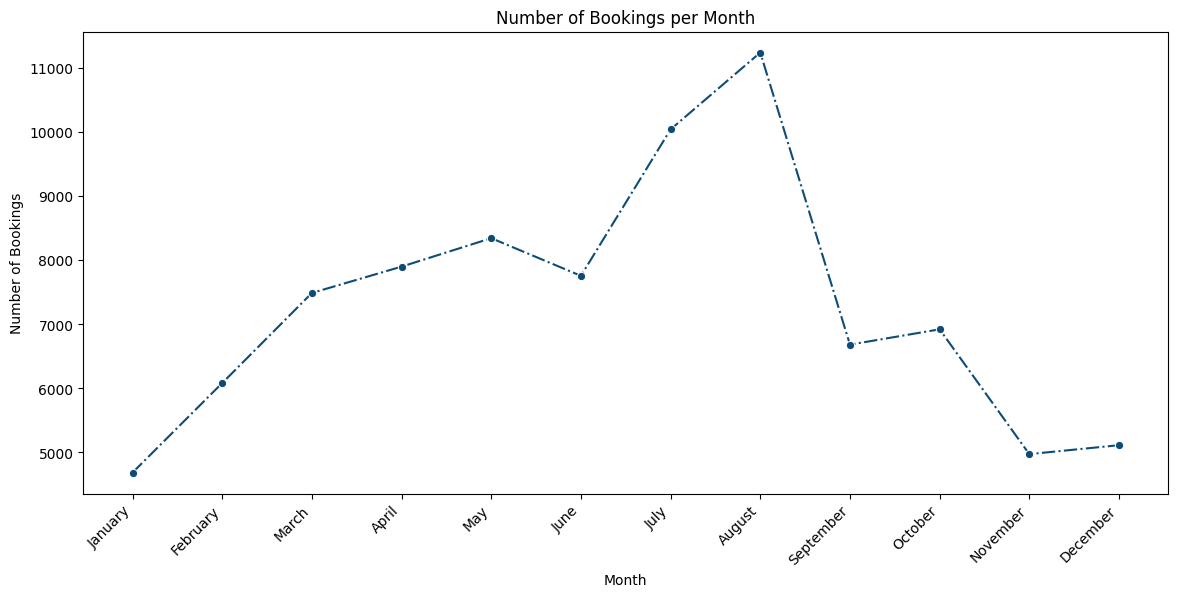

In [ ]:
# Count bookings per month
y = data['arrival_date_month'].value_counts().sort_index()

# Define months in the correct order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x = pd.DataFrame({'Month': months})

# Ensure y values are in the same order as x
y = y.reindex(months).fillna(0)  # Reindex to ensure proper alignment

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot
sns.lineplot(x=months, y=y, marker='o', color='#0F4C75', linestyle='-.')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Month')

# Customize x-axis tick labels
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()


# 5. Distribution of Meal Types


Summary of the Graph:
The pie chart illustrates the distribution of different meal types in the dataset. The categories include BB (Bed and Breakfast), SC (Self-Catering), HB (Half Board), and FB (Full Board). Each segment shows the percentage share of total bookings by meal type.

Key Findings:
BB (Bed and Breakfast) dominates the distribution, accounting for 77.8% of all bookings. SC (Self-Catering) makes up 10.8%, followed closely by HB (Half Board) at 10.4%. FB (Full Board) has the smallest share, representing only 0.41% of total bookings.

Interpretation of Data:
The overwhelming preference for BB (Bed and Breakfast) suggests that most guests favor this meal type, possibly due to the convenience and value it offers. SC (Self-Catering) and HB (Half Board) also have noticeable shares, indicating some guests prefer more flexible or additional dining options. FB (Full Board), however, has a very low uptake, suggesting that guests may not be as interested in having all meals included in their bookings.

Actionable Insights:
Given the significant preference for BB, the hotel could focus its marketing and pricing strategies around Bed and Breakfast packages. To increase interest in SC, HB, and FB, the hotel could consider promoting these meal plans by offering added benefits or discounts. Understanding why FB is less popular could help the hotel design more appealing full-board packages or reconsider the offering altogether if it's not aligned with guest preferences.

In [ ]:

import plotly.express as px
# Count the occurrences of each food type
food_distribution = data['meal'].value_counts().reset_index()

# Plotting the pie chart
fig = px.pie(food_distribution, values=data.groupby('meal').count().reset_index()['hotel'], names= list(data.groupby('meal').count().reset_index()['meal']),
             title='Meal Distribution',
             color='meal',
             color_discrete_map={'BB': '#FFAF45', 'SC': '#C80036 ', 'HB': '#D74B76', 'Other': '#C08B5C', 'FB': '#FB6D48'},
             labels={'count': 'Count', 'meal': 'Meal Type'},
             hole=0.3)

# Customizing layout
fig.update_layout(
    legend=dict(title='Meal Types', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    annotations=[dict(text='Meal Distribution', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()



# 6. Country-Wise Booking Distribution

Summary of the Graph:
The column chart depicts the frequency distribution of hotel bookings based on the Country column. The x-axis represents the names of the countries, while the y-axis shows the frequency of bookings from each country. The chart highlights the countries with the most frequent hotel bookings.

Key Findings:
Portugal has the highest number of bookings, with over 25,000, followed by the United Kingdom at 10,000, and France at 9,000. Other countries have progressively lower frequencies, indicating that these three countries contribute the largest share of bookings in the dataset.

Interpretation of Data:
The data suggests that Portugal, being the top contributor, likely represents the hotel's primary customer base, potentially due to its geographical proximity or regional popularity. The United Kingdom and France also have a significant share of bookings, indicating a strong international customer presence from these regions.

Actionable Insights:
Since Portugal is the dominant market, the hotel may want to reinforce its local marketing efforts to maintain or increase this customer base. Additionally, focusing on international marketing strategies for the United Kingdom and France could help further expand the hotel's reach in these countries. The hotel could also explore potential opportunities to grow its customer base in other countries that show lower booking frequencies by targeting new marketing campaigns or partnerships.








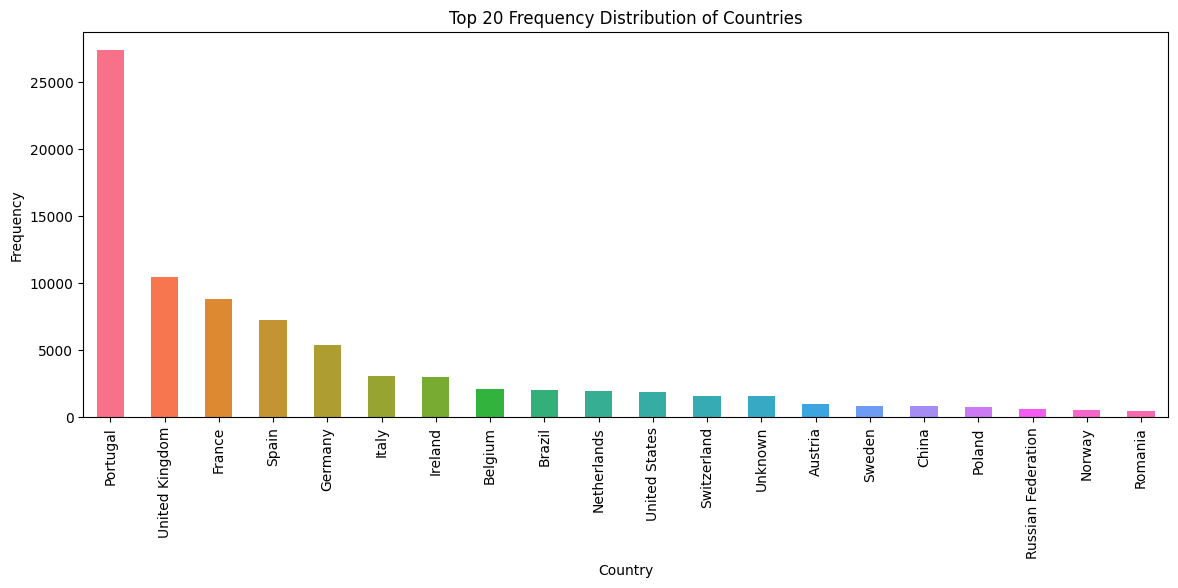

In [ ]:
# Get the top 20 country counts
country_counts = data['Country_Name'].value_counts().sort_values(ascending=False).head(20)

# Set the figure size
plt.figure(figsize=(14, 5))

# Define a color palette
colors = sns.color_palette("husl", len(country_counts))  # You can choose different palettes like "husl", "viridis", etc.

# Plot the frequency distribution as a bar chart with different colors
country_counts.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 20 Frequency Distribution of Countries')
plt.xticks(rotation=90)
plt.show()

# 7. Reserved Room Type Distribution

Summary of the Graph:
The pie chart illustrates the distribution of hotel bookings classified under different reserved_room_type categories. Each segment represents the percentage of total bookings assigned to each room type.

Key Findings:
Room type A is the most popular, accounting for 64.7% of all bookings. Room type D follows with 19.9%, while Room types E, F, G, and B represent 6.92%, 3.23%, 2.35%, and 1.14% of the bookings, respectively. The remaining room types have even smaller shares.

Interpretation of Data:
The dominance of Room type A suggests that this category is highly preferred by the majority of guests, possibly due to its availability, pricing, or features. Room type D is also significantly popular, while the other room types (E, F, G, B, etc.) account for much smaller portions, indicating they may be niche offerings or less in demand.

Actionable Insights:
Given that Room type A constitutes the majority of bookings, the hotel could consider optimizing its inventory and services around this room type. Additionally, promoting Room types D and E, which have substantial shares, might help diversify guest preferences. The hotel could also investigate ways to increase demand for less popular room types (F, G, B, etc.) by offering targeted promotions, upgrades, or bundling these rooms with other perks.

In [ ]:

# Calculate the value counts for reserved_room_type
reserved_room_type = data['reserved_room_type'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
    reserved_room_type,
    names=reserved_room_type.index,
    values=reserved_room_type,
    title='reserved_room_type ',
    hole=0.4
)

plt.figure(figsize=(10, 16))
# Customizing layout
fig.update_layout(
    legend=dict(title='reserved_room_type ', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    annotations=[dict(text='reserved_room', x=0.5, y=0.5, font_size=20, showarrow=False)]
)



<Figure size 1000x1600 with 0 Axes>

#8.Distribution Channel Analysis

Summary of the Graph:
The pie chart illustrates the frequency distribution of bookings across various distribution_channel categories. Each segment represents the percentage and actual number of total bookings through different channels: Travel Agents/Tour Operators (TA/TO), Direct, Corporate, and GDS (Global Distribution System).

Key Findings:

TA/TO (Travel Agents/Tour Operators): 79.1%, representing the majority of bookings.
Direct: 14.9% of the total bookings.
Corporate: 5.8% of all bookings.
GDS (Global Distribution System): 0.005%, a negligible portion of the total bookings.
Interpretation of Data:

The TA/TO channel clearly dominates with 79.1% of all bookings, indicating that most customers use travel agents or tour operators for reservations.
Direct bookings represent 14.9%, suggesting that a significant, albeit smaller, portion of guests book directly with the hotel.
Corporate bookings account for 5.8%, showing some engagement from business travelers.
GDS has an extremely small share at 0.005%, meaning its impact on the hotel’s overall bookings is almost negligible.
Actionable Insights:

With 79.1% of bookings coming from TA/TO, the hotel should maintain strong partnerships with travel agents and tour operators.
To grow Direct bookings, which account for 14.9%, the hotel could implement strategies like offering loyalty programs or exclusive discounts to attract more direct customers.
Corporate bookings (5.8%) could be expanded through targeted marketing efforts aimed at business travelers.
The minimal contribution from GDS (0.005%) suggests that the hotel might reconsider its focus on this channel, or explore opportunities to boost its usage if deemed valuable.

In [ ]:
import plotly.express as px

# Calculate the value counts for distribution_channel
distribution_channel = data['distribution_channel'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
    distribution_channel,
    names=distribution_channel.index,
    values=distribution_channel,
    title='Distribution Channel',
    hole=0.3
)

# Customizing layout
fig.update_layout(
    legend=dict(title='Distribution Channel', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    annotations=[dict(text='Distribution Channel', x=0.5, y=0.5, font_size=20, showarrow=False)]
)




#9. Distribution of deposit types

Summary of the Graph:
The pie chart illustrates the distribution of hotel bookings based on different deposit_type categories. The segments represent the percentage and actual share of bookings under "No Deposit," "Refundable," and "Non-Refundable" deposit types.

Key Findings:

No Deposit: 98.7%, showing that the vast majority of bookings do not require any deposit.
Non-Refundable: 1.19% of bookings are classified as non-refundable, meaning the guest must pay a deposit that cannot be refunded.
Refundable: 0.123% of bookings allow for a refundable deposit.
Interpretation of Data:
The data indicates that almost all bookings (98.7%) are made without any deposit requirement, suggesting that customers strongly prefer flexible booking terms. Only a small fraction (1.19%) of bookings are made with non-refundable deposits, and an even smaller percentage (0.123%) of bookings allow for refundable deposits.

Actionable Insights:

The hotel’s current policy of allowing No Deposit bookings clearly aligns with customer preferences, as it accounts for the vast majority of reservations (98.7%). The hotel may continue this approach to encourage more bookings.
While Non-Refundable deposits represent a minor portion (1.19%) of total bookings, promoting them with added incentives (e.g., discounts for non-refundable bookings) could increase their usage.
The very low percentage of Refundable deposits (0.123%) suggests that this option is not widely utilized. The hotel could explore whether to promote this option more or phase it out based on guest interest and financial feasibility.

In [ ]:
import plotly.express as px

# Calculate the value counts for deposit_type
deposit_type_counts = data['deposit_type'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
    deposit_type_counts,
    names=deposit_type_counts.index,
    values=deposit_type_counts.values,
    title='Deposit Type Distribution',
    hole=0.4  # Set hole to 4 for a solid pie chart ( donut)
)

# Pull out one specific slice (for example, the second slice)
pull_values = [0, 0.2, 0]  # This matches the explode=[0,0.3,0] from matplotlib

# Update traces to pull one slice and add percentage labels
fig.update_traces(
    pull=pull_values,
    textinfo='percent+label',  # Show percentage and label inside the pie slices
    marker=dict(line=dict(color='white', width=2))  # Optional: Add a border to slices
)

# Display the chart
fig.show()


#10. Repeated customer

Summary of the Graph:
The pie chart illustrates the distribution of hotel bookings based on the status of customers as either repeated or new. The segments represent the percentage and actual share of bookings for "Repeated Customer" and "New Customer."

Key Findings:

New Customers (0): 96.1%, indicating that the vast majority of bookings are made by first-time guests.
Repeated Customers (1): 3.86% of bookings come from customers who have previously stayed at the hotel.
Interpretation of Data:
The data suggests that the hotel primarily attracts new customers, with 96.1% of bookings coming from individuals who have not previously stayed at the property. In contrast, only a small fraction (3.86%) of bookings are made by returning customers, indicating limited customer retention.

Actionable Insights:

The hotel should consider strategies to enhance customer loyalty, as only 3.86% of bookings come from repeated customers. Implementing loyalty programs or incentives for returning guests could encourage more repeat business.
To convert new customers into repeat customers, the hotel might focus on improving the overall guest experience, which can lead to higher satisfaction and encourage return visits.
Gathering feedback from guests could provide insights into what motivates them to return, helping the hotel tailor its offerings and marketing strategies to better meet customer needs.

In [ ]:
# Calculate the value counts for deposit_type
is_repeated_guest = data['is_repeated_guest'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(
    is_repeated_guest,
    names=is_repeated_guest.index,
    values=is_repeated_guest.values,
    title='Repeated guest',
    hole=0.0  # Set hole to 0 for a solid pie chart (no donut)
)

# Pull out one specific slice
pull_values = [0, 0.1]

# Update traces to pull one slice and add percentage labels
fig.update_traces(
    pull=pull_values,
    textinfo='percent+label',  # Show percentage and label inside the pie slices
    marker=dict(line=dict(color='white', width=2))  # Optional: Add a border to slices
)

# Display the chart
fig.show()

#11. Customer Type Distribution

Summary of the Graph:
The column chart illustrates the distribution of hotel bookings based on different customer types. The x-axis represents the various customer types, while the y-axis shows the frequency of bookings for each type.

Key Findings:

Transient: More than 70,000 bookings, making it the dominant customer type.
Transient-Party: 10,000 bookings, indicating a significant but much smaller segment.
Contract: 1,000 bookings, representing a minor portion of the total.
Group: Negligible bookings, indicating minimal activity from group reservations.
Interpretation of Data:
The data highlights that the majority of hotel bookings come from Transient customers, who make up over 70,000 of the total bookings. This suggests that individual travelers, rather than groups or contracts, are the primary market for the hotel. Transient-Party customers also contribute a noticeable number of bookings, while Contract and Group bookings are minimal, indicating limited engagement in these areas.

Actionable Insights:

Given the dominance of Transient customers, the hotel may focus its marketing efforts on attracting individual travelers, perhaps through promotional deals or targeted advertising.
There is an opportunity to increase the number of Transient-Party bookings by promoting packages that cater to groups of friends or families traveling together.
The low number of Contract and Group bookings suggests that the hotel could explore strategies to attract these customer types, such as offering competitive rates for long-term stays or group events. Developing partnerships with organizations for group bookings could also enhance occupancy in this area.


In [ ]:
# Count the occurrences of each customer type
customer_counts = data['customer_type'].value_counts()

# Create the bar plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=customer_counts.index,
    y=customer_counts.values,
    marker=dict(color='royalblue'),
    name='Customer Type Counts'
))

# Update layout for figure size and legend placement
fig.update_layout(
    title="Customer Type Counts",
    xaxis_title="Customer Type",
    yaxis_title="Count",
    width=1300,  # Equivalent to figsize=(14, 4) in Matplotlib
    height=400,
    legend=dict(
        x=1.05,
        y=1,
        orientation="v"
    )
)

# Show the plot
fig.show()

#12. Assigned room type


Summary of the Graph:
The column chart illustrates the distribution of hotel bookings based on the assigned_room_type categories. The x-axis represents the various room types, while the y-axis shows the frequency of bookings for each type.

Key Findings:

Room Type A: Almost 50,000 bookings, making it the most popular room type.
Room Type B: More than 20,000 bookings, indicating it is also a significant choice among guests.
Room Type C: 9,000 bookings, which shows a lesser preference.
Room Type E: 4,000 bookings, representing a smaller portion of total bookings.
Other room types (D, F, G, H, I, J, K, L) show progressively lower booking frequencies, with Room Type A being the clear favorite.
Interpretation of Data:
The data indicates that Room Type A is the preferred choice for most guests, with bookings approaching 50,000. Room Type B also sees substantial demand, while Room Types C and E receive considerably fewer bookings. The trend suggests that Room Type A may have features or pricing that make it particularly attractive to guests, while other room types do not garner as much interest.

Actionable Insights:

The hotel should ensure that Room Type A is well-maintained and possibly explore opportunities to enhance its appeal further, such as offering upgrades or special packages.
To boost the booking frequency of Room Type B and other less popular room types, the hotel could implement targeted marketing strategies, such as promotional rates or highlighting unique features of these rooms.
Conducting customer surveys to understand preferences and reasons for room type selection could provide valuable insights into how to adjust offerings and increase bookings across all room types.

<ipython-input-58-7b5b864723be>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

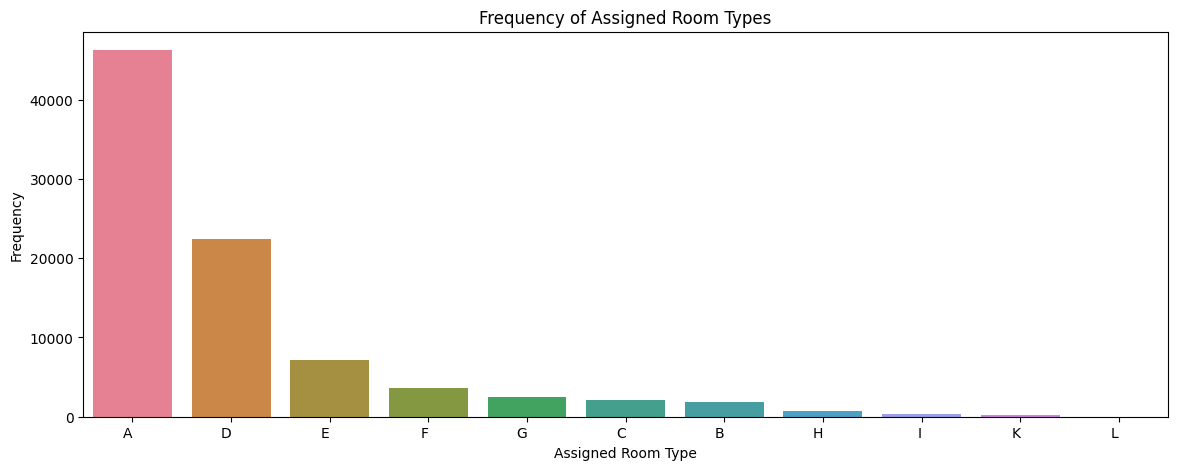

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Set a color palette
colors = sns.color_palette("husl", len(data['assigned_room_type'].value_counts()))

# Plot the bar chart with different colors for each bar
ax = sns.barplot(
    x=data['assigned_room_type'].value_counts().index,
    y=data['assigned_room_type'].value_counts().values,
    palette=colors
)

# Customize the plot
plt.xlabel('Assigned Room Type')
plt.ylabel('Frequency')
plt.title('Frequency of Assigned Room Types')
plt.xticks(rotation=0, ha='right')  # Rotate x labels for better readability

plt.show()

#13. Reservation Status

Summary of the Graph:
The pie chart illustrates the distribution of hotel bookings based on reservation_status categories. Each segment represents the percentage and actual share of bookings classified as "Check-Out," "Canceled," and "No-Show."

Key Findings:

Check-Out: 72.5% of bookings have successfully resulted in guests checking out, indicating a strong completion rate for reservations.
Canceled: 26.4% of bookings were canceled, which represents a significant portion of total reservations.
No-Show: 1.2% of bookings were classified as no-shows, indicating very few guests failed to arrive without prior notice.
Interpretation of Data:
The data suggests that the majority of bookings (72.5%) result in successful check-outs, indicating effective reservation management and customer engagement. However, the 26.4% cancellation rate raises concerns about potential factors leading to cancellations, while the low no-show rate (1.2%) indicates that most guests either show up or cancel their bookings in advance.

Actionable Insights:

The hotel should focus on understanding the reasons behind the high cancellation rate (26.4%) to identify patterns or issues that could be addressed, such as improving booking flexibility or enhancing communication with guests.
To maintain or increase the successful check-out rate, the hotel could implement strategies that enhance the guest experience, ensuring that guests have a positive stay and are likely to return.
Since the no-show rate is low at 1.2%, the hotel might consider maintaining its current booking policies, as they appear effective in ensuring guests either arrive or cancel their reservations.

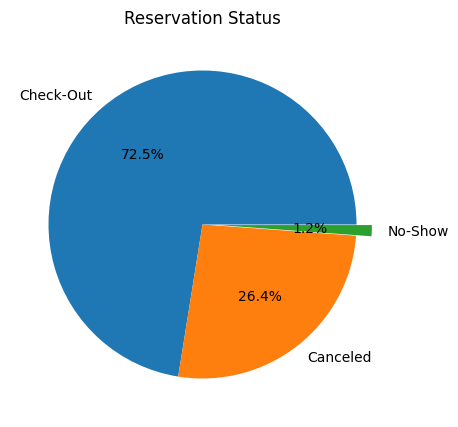

In [ ]:
x = data['reservation_status'].value_counts()
y = data['reservation_status'].value_counts().index

plt.figure(figsize=(12,5))
plt.pie(x=x, labels= y, explode= [0,0,0.1],autopct='%1.1f%%')
plt.title('Reservation Status')
plt.show()

# Bivariate Analysis

#14. Comparison of cancellation rates across months.

Summary of the Graph:
The bar chart compares the cancellation rates across different months of the year, with the x-axis representing the arrival_date_month and the y-axis showing the number of cancellations (is_canceled).

Key Findings:

July: Almost 7,000 bookings were canceled, indicating a high cancellation rate during this month.
August: More than 7,000 bookings were canceled, making it the peak month for cancellations.
January, November, and December: These months show significantly lower cancellation rates compared to the rest of the year, with the fewest cancellations.
Interpretation of Data:
The data suggests that the summer months, especially July and August, experience the highest cancellation rates, which may be linked to changes in guest plans, seasonality, or external factors. In contrast, January, November, and December have the lowest cancellation rates, possibly due to more stable travel plans during these periods.

Actionable Insights:

To reduce the high cancellation rates in July and August, the hotel could consider offering flexible booking options, promotions for non-cancelable bookings, or improving communication with guests to confirm reservations.
During the months with lower cancellation rates (January, November, and December), the hotel may continue current practices but could explore ways to boost overall bookings, as lower cancellations might correlate with fewer reservations.
Analyzing customer feedback during the peak cancellation months could provide further insights into why guests cancel, allowing the hotel to address specific concerns or improve booking policies.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

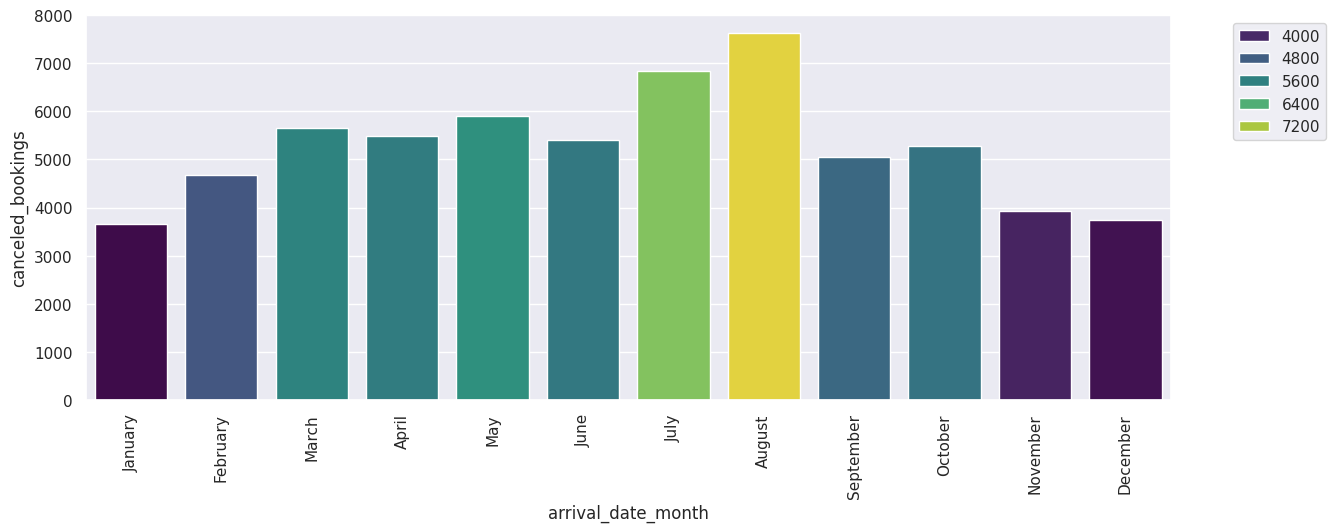

In [ ]:
# Filter and group data
canceled_bookings_per_month = data[data['is_canceled'] == 0].groupby('arrival_date_month').size().reset_index(name='canceled_bookings')

# Define the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical type with the correct order
canceled_bookings_per_month['arrival_date_month'] = pd.Categorical(canceled_bookings_per_month['arrival_date_month'], categories=months_order, ordered=True)

# Sort the DataFrame based on the categorical month order
canceled_bookings_per_month = canceled_bookings_per_month.sort_values('arrival_date_month')

# Set plot style
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(14, 5))

# Plot a bar chart with the specified color
sns.barplot(
    data=canceled_bookings_per_month,
    x='arrival_date_month',
    y='canceled_bookings',
    hue='canceled_bookings',
    errorbar=None,
    palette='viridis'  # Optionally change the palette if you want different colors
)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

#15.  Distribution of adr and Total_Duration


Overview:
The scatter plot illustrates the relationship between adr (average daily rate) and total_duration for a given dataset.

Key Findings:

Concentration in Lower Ranges: The majority of data points are clustered in the lower ranges of both adr and total_duration, indicating that most bookings are for shorter stays with lower average daily rates.
Outliers: There are a few outliers with higher adr and/or total_duration values, suggesting that some bookings involve longer stays or significantly higher rates.
General Trend: While there is no clear linear relationship, a general trend can be observed where shorter stays tend to have lower ADRs, and longer stays might have higher ADRs, although there are exceptions.
Interpretation of Data:

Pricing Strategy: The concentration of data points in the lower ranges might indicate that the hotel's pricing strategy is focused on shorter stays and lower rates.
Customer Preferences: The presence of outliers suggests that there is a demand for longer stays or higher-priced accommodations, although these might be less frequent.
Revenue Potential: Understanding the relationship between adr and total_duration can help hotels identify opportunities to optimize pricing and packaging strategies to increase revenue.
Actionable Insights:

Pricing Segmentation: Hotels can consider segmenting their offerings based on total_duration and adr to target different customer preferences and maximize revenue.
Package Deals: Creating package deals that include longer stays and additional services might be attractive to customers seeking value.
Revenue Management: Analyzing the distribution of data points can help hotels optimize their revenue management strategies, such as dynamic pricing and overbooking.
Overall, the scatter plot provides valuable insights into the relationship between ADR and total stay, enabling hotels to make data-driven decisions and improve their pricing and revenue management strategies.

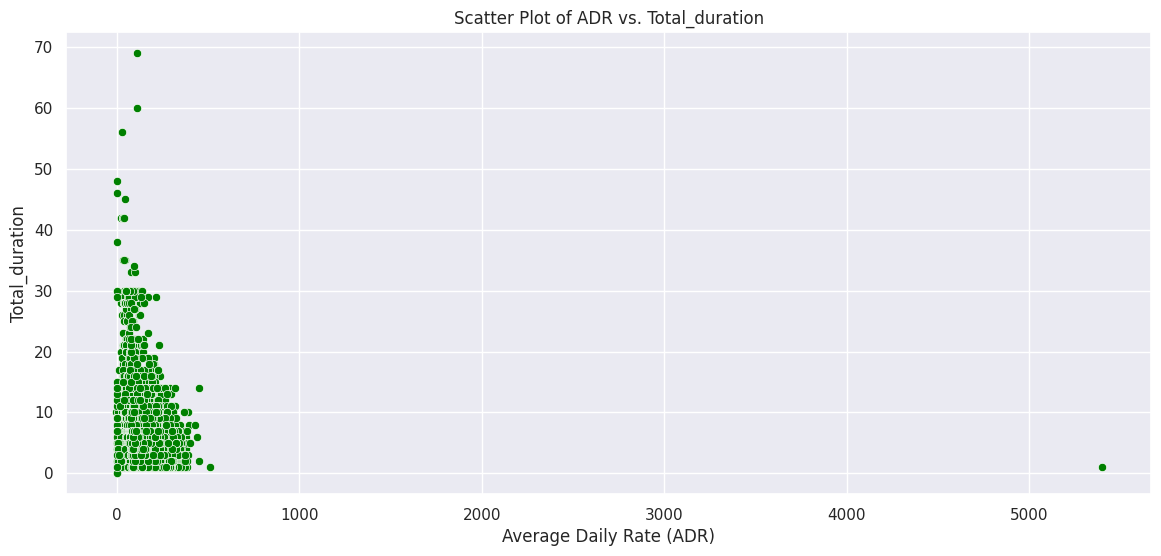

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for 'adr' vs 'lead_time'
plt.figure(figsize=(14, 6))
sns.scatterplot(x='adr', y='total_duration', data=data, color='green')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Total_duration')
plt.title('Scatter Plot of ADR vs. Total_duration')
plt.show()



In [ ]:
# Removing the outlier
data.drop(data[data['adr'] > 5000].index, inplace = True)

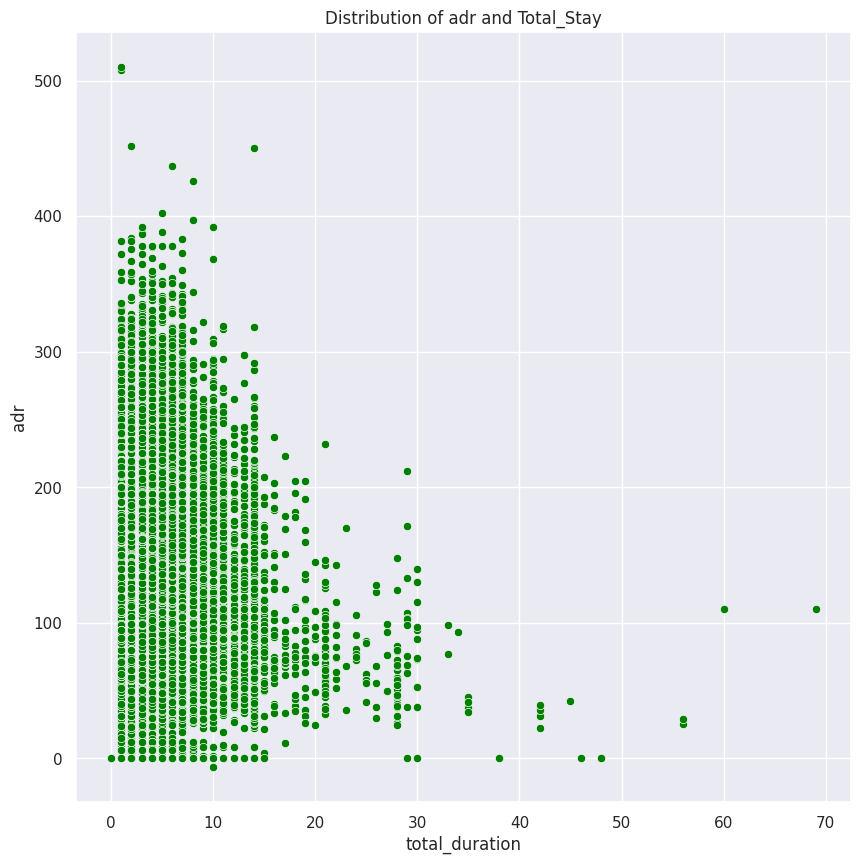

In [ ]:
plt.figure(figsize = (10,10))
# Using Seaborn Scatterplot for visualization
sns.scatterplot(x = 'total_duration',y = 'adr', data = data,color='green')
plt.title("Distribution of adr and Total_Stay")
#show the plot
plt.show()

#16. Lead Time Vs Is_Cancelled



Overview:
The scatter plot illustrates the relationship between lead_time (the number of days between the booking and the arrival date) and is_canceled (a binary variable indicating whether the booking was canceled or not).

Key Findings:

Clustering: The data points are clustered in specific regions of the plot.
A significant number of bookings with short lead times (less than 100 days) were not canceled.
There is a cluster of canceled bookings with lead times between 100 and 200 days.
Bookings with very long lead times (over 500 days) are relatively rare, and their cancellation status is mixed.
Outliers: There are a few outliers with very long lead times and non-canceled bookings.
Interpretation of Data:

Cancellation Patterns: The clustering suggests that certain lead time ranges might be associated with higher or lower cancellation rates.
Early Bookings: Bookings made further in advance (with longer lead times) might be less likely to be canceled, especially when the lead time is very long.
Short-Term Bookings: Bookings made closer to the arrival date (with shorter lead times) might have a higher chance of being canceled.
Actionable Insights:

Cancellation Prevention: Hotels can focus on strategies to reduce cancellations for bookings in the lead time ranges associated with higher cancellation rates.
Early Bird Discounts: Offering discounts or incentives for bookings made well in advance might encourage more bookings and reduce cancellations.
Flexible Policies: Implementing flexible cancellation policies might be beneficial for bookings with shorter lead times to increase customer confidence.
Overall, the scatter plot provides valuable insights into the relationship between lead time and cancellation status, enabling hotels to make data-driven decisions and improve their booking and cancellation management strategies.

<Axes: xlabel='lead_time', ylabel='mean'>

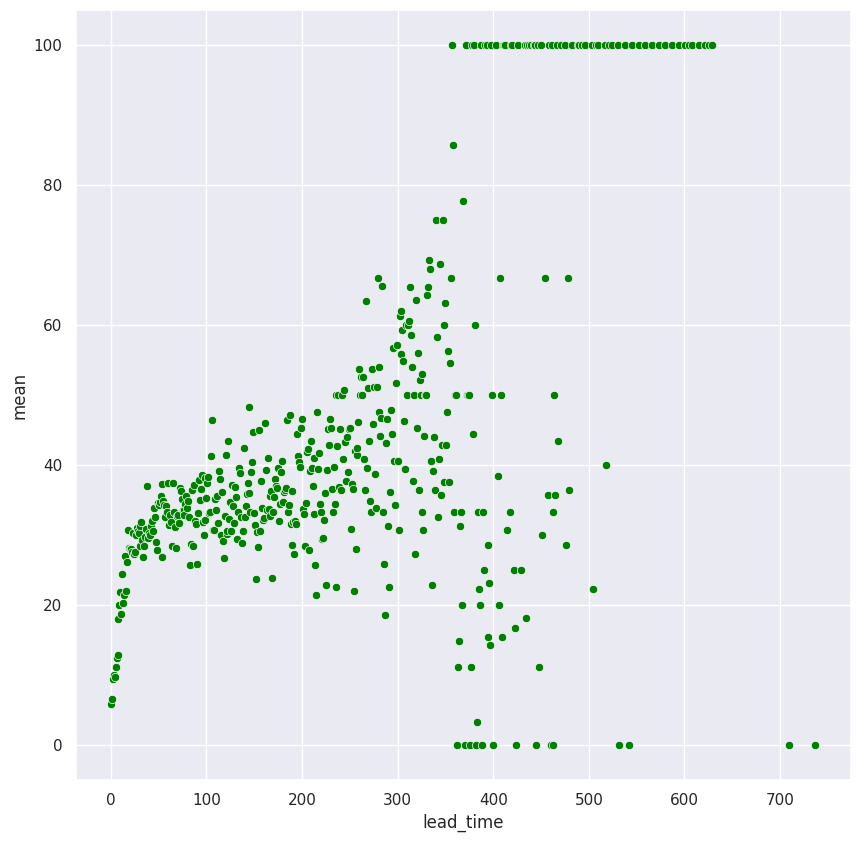

In [ ]:

# grouping by lead time
fig1= data.groupby("lead_time")['is_canceled'].describe()
# Using Seaborn scatterplot  for visualization
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=fig1.index, y=fig1["mean"] * 100,color='green')

#17. Average adr vary by market_segment?

Summary of the Graph:
The column chart shows how the average adr (Average Daily Rate) varies across different market_segment categories. The x-axis represents the average adr, while the y-axis lists the various market segments.

Key Findings:

Direct and Online TA segments have the highest average adr at 120, indicating that customers booking through these channels tend to pay more per day.
Aviation has an average adr of 100, which is relatively high compared to other segments.
Offline TA/TO has an average adr of 80, showing a moderate rate.
Groups: The average adr for group bookings is 75, suggesting a lower rate for bulk bookings.
Corporate: Corporate bookings have an average adr of 70, indicating budget-conscious bookings.
Complementary: This segment has the lowest average adr at 2, as these bookings often involve no charge or minimal fees.
Interpretation of Data:
The data indicates that the Direct and Online TA segments are the most profitable for the hotel, with an average daily rate of 120. Aviation and Offline TA/TO follow with moderate rates, while Groups and Corporate bookings offer lower daily rates. The Complementary segment, as expected, has an extremely low adr since it often involves no charge.

Actionable Insights:

The hotel may want to focus on increasing bookings through Direct and Online TA channels, which bring in the highest revenue per day.
To boost revenue from segments with lower adr, such as Groups and Corporate, the hotel could consider offering additional services or upselling premium options.
Complementary bookings (adr = 2) might be reserved for special occasions or partnerships, but the hotel could assess if there is a strategic benefit to offering these bookings, or consider minimizing them to focus on more profitable segments.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

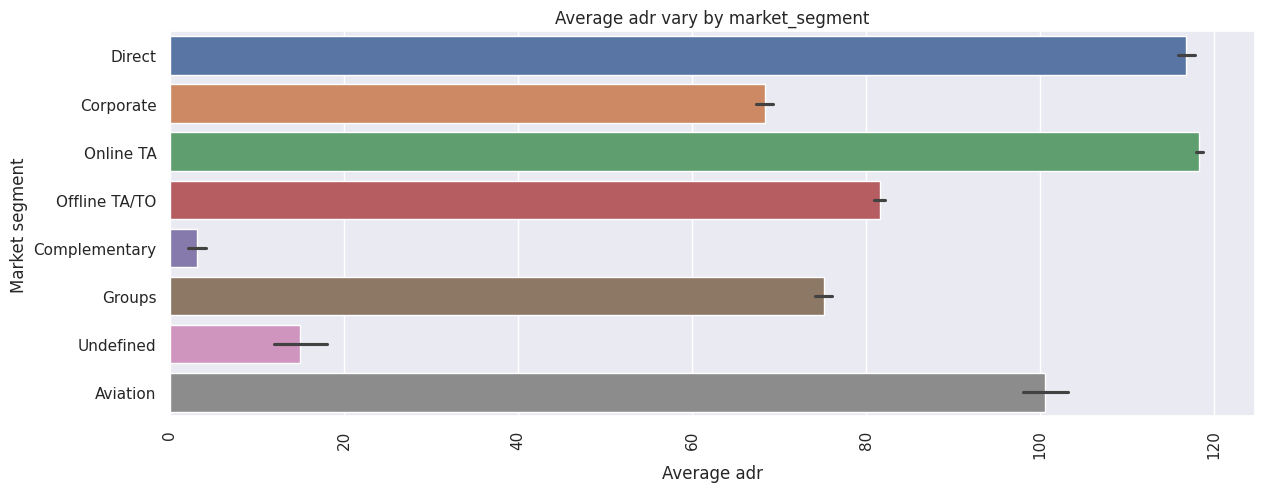

In [ ]:
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(14, 5))

sns.barplot(x = data['adr'], y = data['market_segment'], hue = data['market_segment'])
plt.xlabel('Average adr')
plt.ylabel('Market segment')
plt.title('Average adr vary by market_segment')
plt.xticks(rotation=90)
plt.show()

#18. What is the relationship between arrival_date_month and the number of bookings?

Summary of the Graph:
The line chart illustrates the relationship between the arrival_date_month and the total number of bookings. The x-axis represents the months of arrival, while the y-axis shows the total number of bookings per month.

Key Findings:

January to August: There is a steady increase in bookings, with a peak in August, where more than 11,000 bookings were made.
September: Bookings drop sharply to 7,000, representing a significant decline after the peak.
October, November, and December: The downward trend continues, with bookings stabilizing at around 5,000 during these months.
Interpretation of Data:
The data suggests a clear seasonal pattern in bookings, with a steady rise from January to August, likely due to high demand during the summer months or holiday periods. August sees the highest number of bookings, marking the peak season. However, there is a sharp decline in September, followed by a continued decrease in bookings during the final quarter of the year (October, November, December), indicating a slow season for the hotel.

Actionable Insights:

Given the peak in bookings during August, the hotel should ensure they are well-prepared during this high-demand period by optimizing staffing, room availability, and pricing strategies to maximize revenue.
The sharp decline starting in September suggests a need for promotions or discounts to maintain bookings during the off-peak season. Offering special packages or deals during the fall and winter months could help boost occupancy.
Analyzing customer preferences during the peak season could provide insights into how to maintain or even increase bookings throughout the year, by replicating popular offers or services during slower periods.

<ipython-input-66-1fd828afb3f6>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



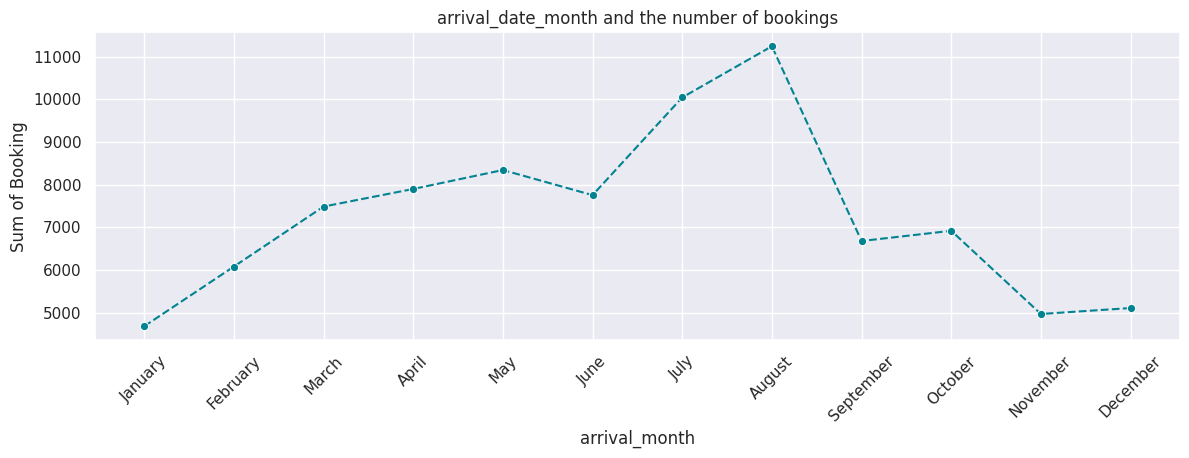

In [ ]:
# Define the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical type with the correct order
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=months_order, ordered=True)

# Group by the ordered 'arrival_date_month' and count cancellations
total = data.groupby('arrival_date_month')['is_canceled'].count()

# Set the figure size
plt.figure(figsize=(14, 4))

# Plot the line chart
sns.lineplot(x=total.index, y=total.values, marker='o', linestyle='--', color='#028391')
plt.xlabel('arrival_month')
plt.ylabel('Sum of Booking')
plt.title('arrival_date_month and the number of bookings')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


#19. What is the relationship between total_of_special_requests and booking cancellations.

Summary of the Graph:
The grouped bar chart illustrates the relationship between the total_of_special_requests and booking cancellations (is_canceled). The x-axis represents the total number of special requests, and the y-axis shows the number of bookings, categorized into "Canceled" and "Not Canceled."

Key Findings:

0 Special Requests: Nearly 15,000 bookings were canceled, while around 29,000 were not canceled, showing that bookings with no special requests are more likely to result in cancellations.
1 Special Request: Around 6,000 cancellations occurred, while 22,000 bookings were not canceled, indicating that bookings with one special request have a lower cancellation rate.
2 Special Requests: Interestingly, 9,000 bookings were canceled, while only 2,000 were not canceled, suggesting a higher cancellation rate for bookings with two special requests.
3 Special Requests: Around 1,000 bookings were canceled, and only 100 were not canceled, showing a sharp increase in cancellations as the number of requests rises.
4 and 5 Special Requests: Negligible bookings were observed, with few cancellations or confirmed bookings.
Interpretation of Data:
The data suggests a clear relationship between the number of special requests and booking cancellations. Bookings with no special requests have a higher chance of being canceled, while those with one special request are more likely to be confirmed. However, the likelihood of cancellations increases again when the number of special requests reaches two or more, potentially due to unmet guest expectations or more complex booking requirements.

Actionable Insights:

To reduce cancellations for bookings with no special requests, the hotel could improve pre-stay communication or offer incentives to ensure guests follow through with their reservations.
Bookings with two or more special requests seem more prone to cancellations. The hotel could explore enhancing their capacity to meet these requests, or better manage guest expectations by confirming request feasibility upfront.
Analyzing why cancellations occur for bookings with multiple special requests may reveal key areas where the hotel can improve, such as offering personalized services or adding flexibility to special requests.

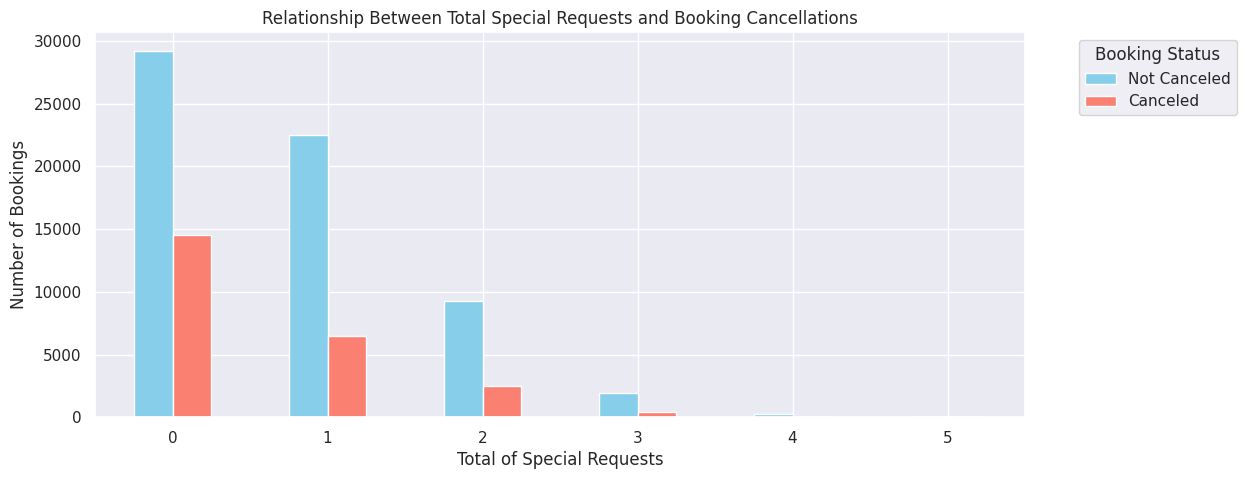

In [ ]:
# Group the data by total_of_special_requests and is_canceled
pivot_table = data.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)

# Plotting the grouped bar chart

pivot_table.plot(
    kind='bar',
    stacked=False,
    figsize=(12, 5),
    color=['skyblue', 'salmon']
)

# Add titles and labels
plt.title('Relationship Between Total Special Requests and Booking Cancellations')
plt.xlabel('Total of Special Requests')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#20. What is the relationship between country and the number of bookings?

Summary of the Graph:
The grouped bar chart illustrates the relationship between country and the number of bookings. The x-axis represents different countries, while the y-axis shows the total number of bookings, along with the number of cancellations for each country.

Key Findings:

Portugal: Leads with the highest number of bookings at more than 25,000, but also has around 9,000 cancellations, indicating a significant drop-off.
United Kingdom: Shows over 10,000 bookings with approximately 3,000 cancellations, suggesting a moderate cancellation rate.
France: Records 8,000 bookings and 2,000 cancellations, indicating a relatively lower cancellation rate compared to the UK.
Italy: Has 6,000 bookings with 1,000 cancellations, suggesting a stable booking trend.
Germany: Matches Italy with 6,000 bookings and also 1,000 cancellations, reflecting similar patterns.
Other Countries: Countries like Brazil, Ireland, and China show significantly lower booking numbers and cancellation rates compared to the top countries.
Interpretation of Data:
The data indicates that Portugal is the primary market for bookings, with a high volume but also a notable cancellation rate. The United Kingdom and France follow, showing substantial bookings but with varying cancellation rates. In contrast, other countries have lower overall bookings and cancellations, indicating that they may represent niche markets or have less demand.

Actionable Insights:

Given the high cancellation rate in Portugal, the hotel could explore strategies to reduce cancellations, such as offering more flexible booking options or enhancing customer engagement before arrival.
For the United Kingdom and France, targeted marketing campaigns could be beneficial to capitalize on existing interest while reducing the cancellation rate by addressing potential customer concerns.
The hotel should consider developing specific strategies to increase bookings from countries with lower numbers, like Brazil, Ireland, and China, possibly through localized marketing efforts or partnerships with travel agencies in those regions.

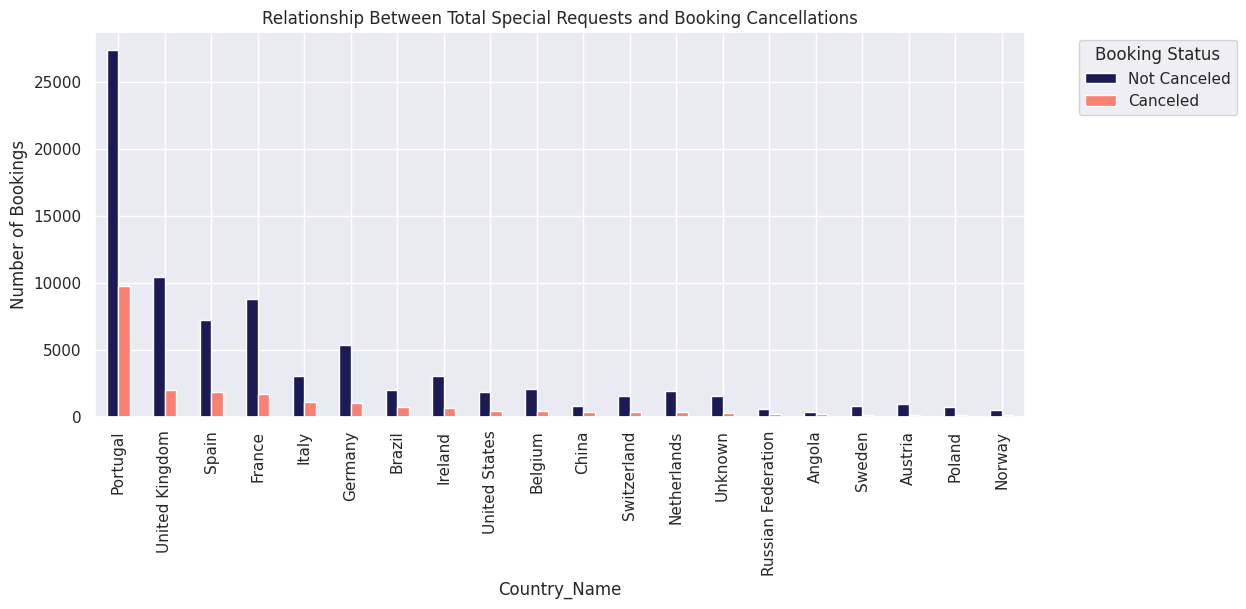

In [ ]:

cou = data.groupby('Country_Name').agg({'Country_Name': 'count', 'is_canceled': 'sum'})
country_cancel = cou.sort_values(by='is_canceled', ascending = False).head(20)

# Plotting the grouped bar chart

country_cancel.plot(
    kind='bar',
    stacked=False,
    figsize=(12, 5),
    color=['#1B1A55', 'salmon']
)

# Add titles and labels
plt.title('Relationship Between Total Special Requests and Booking Cancellations')
plt.xlabel('Country_Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#22. What is the relationship between reserved_room_type and assigned_room_type?

Summary of the Graph:
The grouped bar chart illustrates the relationship between reserved_room_type and assigned_room_type, with the x-axis representing room types and the y-axis showing the number of bookings. Both reserved and assigned room types are displayed for comparison.

Key Findings:

Room Type A: Has the highest number of both reserved and assigned bookings, with 46,283 each. This makes it the most frequently reserved and assigned room type.
Room Type D: Follows as the second most popular, with 22,419 reserved and assigned bookings.
Room Type E: Records 7,190 bookings for both reserved and assigned rooms, making it the third most popular.
Other Room Types (B, C, F, G, H): These room types show significantly fewer bookings, with reserved and assigned numbers aligning closely (e.g., B has 1,811, and F has 3,627).
Room Types I, K, L: These room types are negligible, with almost no reservations or assignments, indicating very low usage.
Interpretation of Data:
The data reveals that Room Type A is the most frequently reserved and assigned room, indicating high guest preference for this type. Room Types D and E are also frequently booked, but other room types (B, C, F, G, H) have lower usage. The minimal activity for Room Types I, K, and L suggests they are rarely used or assigned.

Actionable Insights:

Room Type A: Since it’s in high demand, the hotel could consider offering more of this room type or optimizing its pricing strategy to capitalize on its popularity.
Room Types D and E: These room types should also be highlighted in promotions, as they are popular choices.
Lower Booking Types (B, C, F, G, H): The hotel could investigate ways to improve the desirability of these rooms, perhaps through package deals or upgrades.
Negligible Room Types (I, K, L): The hotel may want to reassess these room types for repurposing or offering special incentives to encourage more bookings.

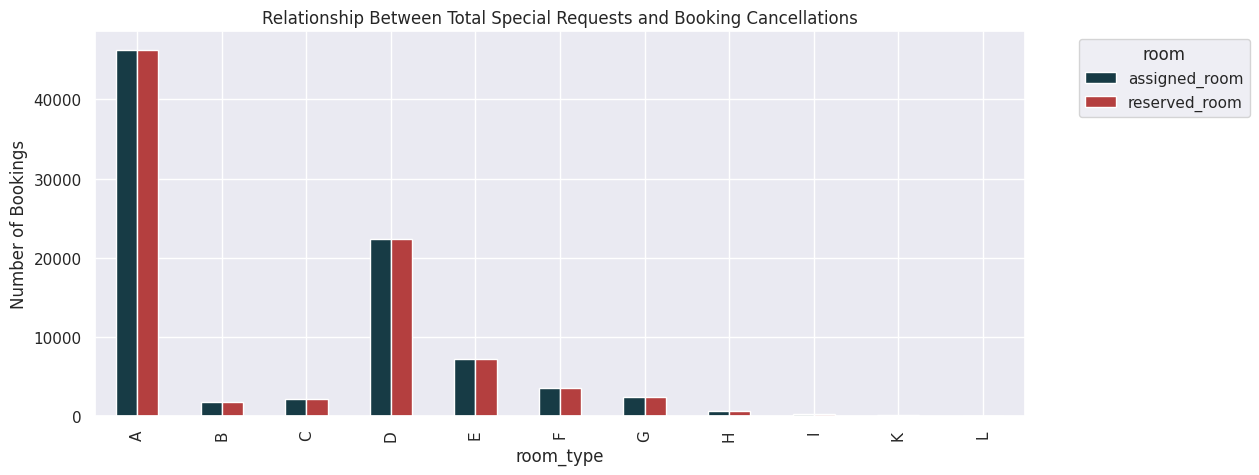

In [ ]:
ass_room= data.groupby(['assigned_room_type']).agg({'assigned_room_type': 'count', 'reserved_room_type': 'count'})

# Plotting the grouped bar chart

ass_room.plot(
    kind='bar',
    stacked=False,
    figsize=(12, 5),
    color=['#173B45', '#B43F3F']
)

# Add titles and labels
plt.title('Relationship Between Total Special Requests and Booking Cancellations')
plt.xlabel('room_type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.legend(title='room', labels=['assigned_room', 'reserved_room'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
ass_room= data.groupby(['assigned_room_type']).agg({'assigned_room_type': 'count', 'reserved_room_type': 'count'})
ass_room

,assigned_room_type,reserved_room_type
assigned_room_type,,
A,46282,46282
B,1811,1811
C,2160,2160
D,22419,22419
E,7190,7190
F,3627,3627
G,2495,2495
H,706,706
I,353,353


#23. How does the cancellation rate vary by reservation_status?

Summary of the Graph:
The bar chart visualizes the variation in cancellation rates (is_canceled) by reservation_status. The x-axis represents the reservation status, while the y-axis represents the number of bookings.

Key Findings:

Canceled Status: The number of canceled bookings is significantly higher, with almost 20,000 cancellations.
Non-Canceled Status: Non-canceled bookings, which include reservations that resulted in a successful check-out, no-show, or bookings with no cancellations, amount to around 1,000 bookings.
Interpretation of Data:
The data indicates a significantly higher cancellation rate compared to non-canceled bookings. The high number of cancellations suggests that the hotel may be facing challenges in converting reservations into successful stays, which could be related to factors such as pricing, customer satisfaction, or external conditions (e.g., travel restrictions).

Actionable Insights:

Cancellation Reduction Strategies: The hotel should consider strategies to reduce cancellations, such as flexible booking policies, clear communication, or incentives for customers who follow through with their bookings.
Focus on Customer Engagement: Improved pre-arrival customer engagement through timely reminders or check-ins could help reduce cancellations and improve conversion rates.
Analyze Cancellation Reasons: The hotel may want to analyze further the reasons behind these cancellations to better address customer concerns and enhance the booking experience.

<ipython-input-71-9d1fb88a3362>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



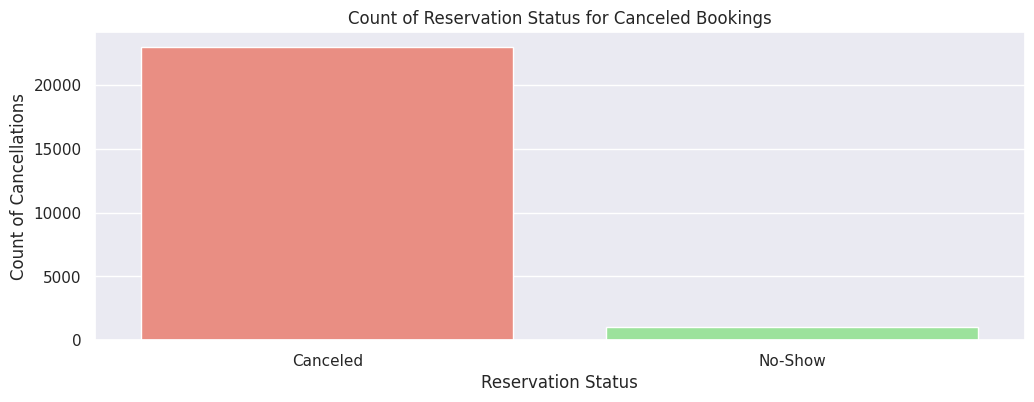

In [ ]:
cancel_reservation_status = data[data['is_canceled'] != 0].groupby( 'reservation_status')['reservation_status'].count()
x=cancel_reservation_status.index
y=cancel_reservation_status.values

# Plot the bar chart
plt.figure(figsize=(12, 4))
sns.barplot(x=x, y=y,  palette=['salmon', 'lightgreen'])

# Add titles and labels
plt.title('Count of Reservation Status for Canceled Bookings')
plt.xlabel('Reservation Status')
plt.ylabel('Count of Cancellations')
plt.show()

#24. Distribution of market_segment by hotel

Summary of the Graph:
The grouped bar chart displays the distribution of market_segment by hotel_type. The x-axis represents two hotel types: City Hotel and Resort Hotel, while the y-axis shows the number of bookings for each market segment.

Key Findings:

City Hotel:
Online: The most significant contributor, with around 35,000 bookings.
Offline: Has about 7,000 bookings.
Groups: Contribute around 3,000 bookings.
Direct: Over 5,000 bookings.
Corporate: Accounts for about 2,000 bookings.
Complementary: Around 900 bookings.
Resort Hotel:
Online: Close to 17,000 bookings.
Offline: Has around 7,000 bookings.
Groups: Contribute around 3,000 bookings.
Direct: Over 5,000 bookings.
Corporate: Accounts for around 2,000 bookings.
Complementary: Around 900 bookings.
Interpretation of Data:
The data shows that for both hotel types, Online bookings dominate as the primary market segment. Offline bookings follow, with similar patterns across City Hotels and Resort Hotels. Market segments like Groups, Direct, and Corporate have comparable booking levels across both types of hotels, while Complementary bookings remain low in both cases.

Actionable Insights:

Target Online Market: Since online bookings make up the largest segment for both hotel types, the hotel should continue leveraging partnerships with online travel agencies and consider optimizing digital marketing efforts.
Promote Direct Bookings: Although direct bookings are substantial, increasing them through exclusive offers, loyalty programs, or direct communication could help the hotel reduce its reliance on third-party platforms.
Focus on Group Bookings: With groups contributing a notable number of bookings, especially for Resort Hotels, the hotel could create group-oriented packages or promotions to further boost this segment.
This comparison of booking patterns across both hotel types can guide the hotel's marketing and sales strategies to cater to different customer segments effectively.

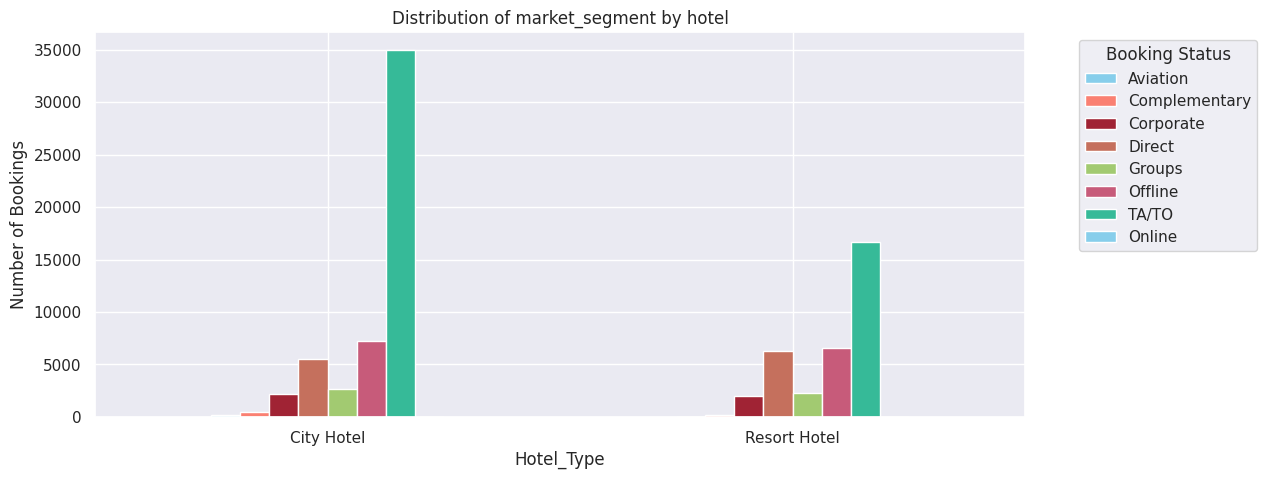

In [ ]:
country_cancel = data.groupby(['hotel', 'market_segment']).agg({'market_segment': "count"}).unstack(fill_value=0)

# Plotting the grouped bar chart

country_cancel.plot(
    kind='bar',
    stacked=False,
    figsize=(12, 5),
    color=['skyblue', 'salmon', '#A02334','#C5705D','#A2CA71', "#C75B7A", "#36BA98"]
)

# Add titles and labels
plt.title('Distribution of market_segment by hotel')
plt.xlabel('Hotel_Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=00)
plt.legend(title='Booking Status', labels=['Aviation'	,'Complementary',	'Corporate'	,'Direct','Groups',	'Offline', 'TA/TO','Online', 'TA'	,'Undefined'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#25. Booking Canceled or Not VS Deposit type

Summary of the Graph:
The grouped bar chart shows the relationship between booking cancellations (is_canceled) and deposit_type. The x-axis represents different deposit types, while the y-axis shows the total number of bookings.

Key Findings:

No Deposit:

Canceled: More than 60,000 bookings were canceled when no deposit was required.
Not Canceled: Almost 20,000 bookings went through without cancellation.
Non-Refundable:

Canceled: There are no canceled bookings in this category.
Not Canceled: About 1,000 bookings did not cancel.
Refundable:

The chart shows minimal or negligible bookings for both canceled and not canceled, indicating that the refundable deposit type has little data or impact.
Interpretation of Data:
The data reveals that the majority of canceled bookings occur when no deposit is required. This suggests that customers may be more likely to cancel their bookings when they have no financial obligation. Conversely, there are no cancellations in the non-refundable category, showing that customers tend to commit to bookings where they have a financial stake.

Actionable Insights:

Incentivize Deposits: The hotel may want to encourage customers to make a deposit, even if it's refundable, to reduce cancellation rates. This could be done by offering incentives such as discounts or added perks for bookings with deposits.
Reconsider No-Deposit Policy: The high cancellation rate for no deposit bookings suggests the need to reassess this policy. Introducing minimal deposits might help reduce cancellations and ensure more confirmed stays.
Enhance Non-Refundable Options: The zero cancellations in non-refundable bookings highlight its effectiveness. The hotel could offer non-refundable options at a slight discount to encourage more commitment from customers.
This analysis can help the hotel strategize around its deposit policies to lower cancellation rates and secure more confirmed bookings.

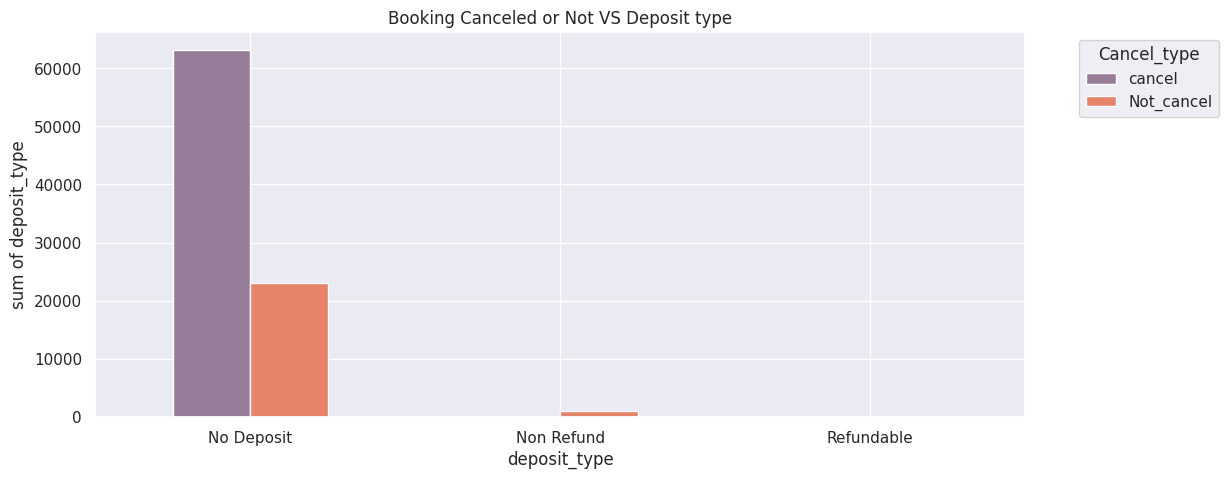

In [ ]:
# Plotting the grouped bar chart
deposit_type_cancel = data.groupby(['deposit_type', 'is_canceled']).agg({'deposit_type': 'count'}).unstack(fill_value=0)
deposit_type_cancel.plot(
    kind='bar',
    stacked=False,
    figsize=(12, 5),
    color=[ "#987D9A", "#E68369"]
)

# Add titles and labels
plt.title('Booking Canceled or Not VS Deposit type')
plt.xlabel('deposit_type')
plt.ylabel('sum of deposit_type')
plt.xticks(rotation=00)
plt.legend(title='Cancel_type', labels=['cancel', 'Not_cancel'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#26. Cancellation_rate vs Customer_type


Summary of the Graph:
The grouped bar chart illustrates the relationship between cancellation_rate and customer_type. The x-axis represents different customer types, and the y-axis shows the total number of bookings, both canceled and non-canceled.

Key Findings:

Transient:
Canceled: The highest cancellation rate, with 50,000 bookings canceled.
Not Canceled: Around 21,000 bookings were successfully completed.
Transient-Party:
Canceled: Around 10,000 bookings canceled.
Not Canceled: Only 1,000 bookings were completed.
Contract:
Canceled: Around 3,000 bookings were canceled.
Not Canceled: Approximately 500 bookings went through without cancellation.
Group:
Canceled: No bookings were canceled.
Not Canceled: About 500 bookings were successfully completed.
Interpretation of Data:
The data clearly shows that Transient customers have the highest cancellation rates, with a significant number of bookings canceled compared to other customer types. Transient-Party follows with a substantial number of cancellations, but much lower compared to Transient. Both Contract and Group customer types show a much lower number of cancellations, indicating more stable booking patterns.

Actionable Insights:

Focus on Reducing Cancellations for Transient Customers: Since Transient customers have the highest cancellation rate, the hotel might want to focus on improving the booking experience for this segment, possibly through better communication, flexible policies, or incentives to reduce cancellations.
Strengthen Transient-Party Engagement: The significant cancellation rate for Transient-Party customers suggests a need for targeted strategies, such as offering group discounts or adding benefits to encourage completion of bookings.
Leverage Contract and Group Stability: The low cancellation rates for Contract and Group customers suggest a more reliable booking pattern. The hotel can consider expanding partnerships with companies or groups to secure more consistent bookings.
By addressing the reasons for cancellations among different customer types, the hotel can enhance its booking management and improve overall retention rates.

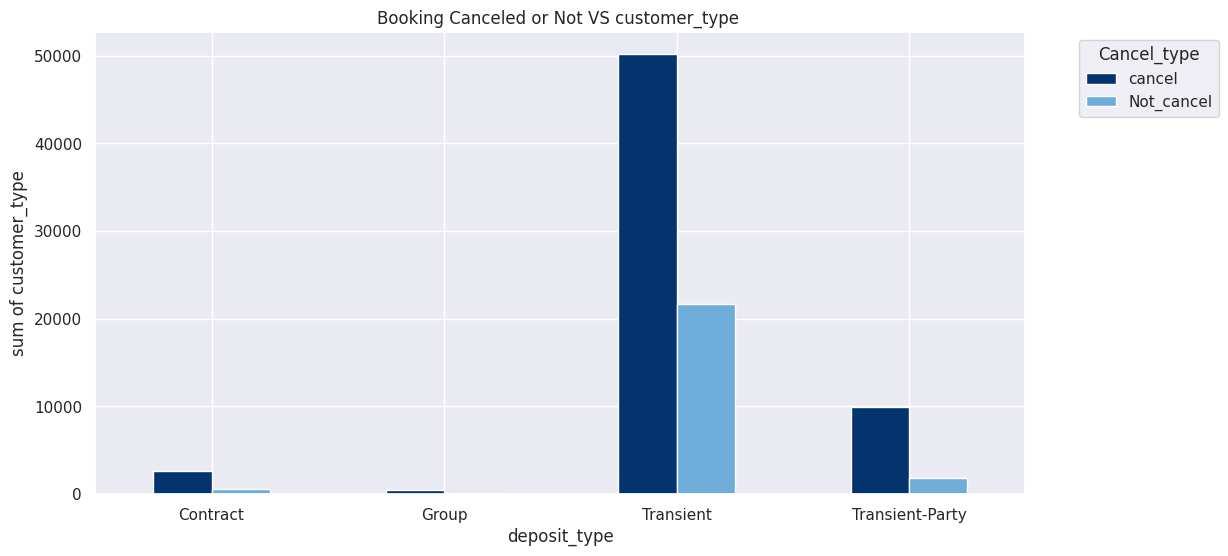

In [ ]:
# Plotting the grouped bar chart
customer_type_cancel = data.groupby(['customer_type', 'is_canceled']).agg({'customer_type': 'count'}).unstack(fill_value=0)
customer_type_cancel.plot(
    kind='bar',
    stacked=False,
    figsize=(12,6),
    color=[ "#03346E", "#6EACDA"]
)

# Add titles and labels
plt.title('Booking Canceled or Not VS customer_type ')
plt.xlabel('deposit_type')
plt.ylabel('sum of customer_type')
plt.xticks(rotation=00)
plt.legend(title='Cancel_type', labels=['cancel', 'Not_cancel'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#27. Market segment vs Booking Cancellation or not

Summary of the Graph:
The grouped bar chart compares market_segment with booking cancellations (is_canceled). The x-axis represents different market segments, while the y-axis shows the total number of bookings, divided into canceled and non-canceled categories.

Key Findings:

Online TA:
Canceled: The highest cancellation rate with over 30,000 bookings.
Not Canceled: Close to 20,000 bookings were completed.
Offline TA/TO:
Canceled: Around 11,000 bookings canceled.
Not Canceled: Only 1,000 bookings were completed.
Groups:
Canceled: Around 4,000 bookings canceled.
Not Canceled: About 1,000 bookings were successfully completed.
Direct:
Canceled: Approximately 10,000 bookings canceled.
Not Canceled: Around 2,000 bookings completed.
Corporate:
Canceled: Around 4,000 bookings canceled.
Not Canceled: Fewer than 1,000 bookings completed.
Aviation and Complementary:
Both market segments have negligible bookings and cancellations.
Interpretation of Data:
The data highlights that Online Travel Agencies (TA) dominate the booking and cancellation landscape, with the largest share of both canceled and non-canceled bookings. Offline TA/TO, Direct, and Corporate also have significant cancellation rates, though their non-canceled bookings are far fewer. Segments like Groups have relatively fewer cancellations, while Aviation and Complementary bookings have minimal impact.

Actionable Insights:

Target Online TA for Cancellation Reduction: Given the high cancellation rate for Online TA bookings, the hotel should work on improving cancellation policies, offering flexibility, or creating incentives to reduce cancellations through this channel.
Improve Offline TA/TO and Direct Booking Experiences: The high cancellation rates for Offline TA/TO and Direct bookings suggest potential areas for customer experience improvements. The hotel could introduce special offers or provide better customer support to lower cancellations in these segments.
Leverage Group Stability: The relatively stable booking behavior of Groups indicates a lower risk of cancellation. Promoting group packages or offering more benefits to this segment could help increase bookings with low cancellation risks.
By understanding the cancellation patterns across different market segments, the hotel can fine-tune its strategies to maximize booking retention and minimize cancellations.

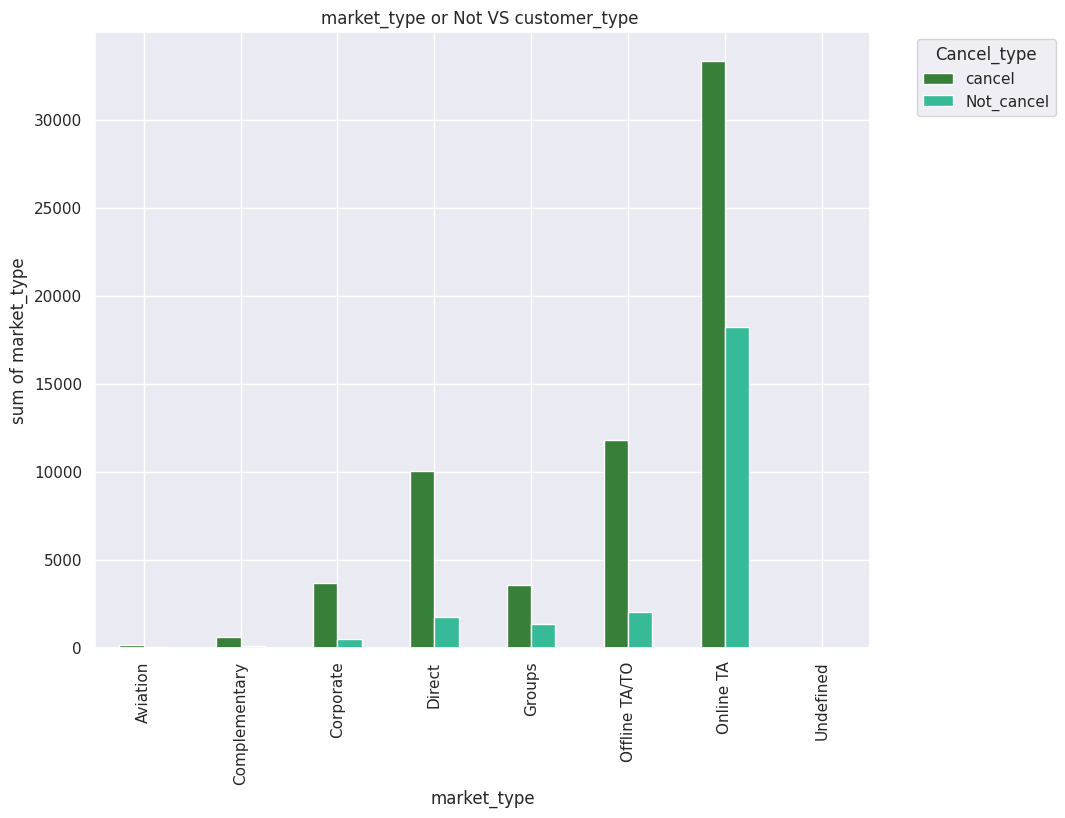

In [ ]:
data.groupby(['market_segment', 'is_canceled']).agg({'market_segment': 'count'}).unstack(fill_value=0)

# Plotting the grouped bar chart
market_type_cancel = data.groupby(['market_segment', 'is_canceled']).agg({'market_segment': 'count'}).unstack(fill_value=0)
market_type_cancel.plot(
    kind='bar',
    stacked=False,
    figsize=(10, 8),
    color=[ "#387F39", "#36BA98"]
)

# Add titles and labels
plt.title('market_type or Not VS customer_type ')
plt.xlabel('market_type')
plt.ylabel('sum of market_type')
plt.xticks(rotation=90)
plt.legend(title='Cancel_type', labels=['cancel', 'Not_cancel'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#28. Average Daily Rate trends over years

Interpretation of Data:
The line chart illustrates a consistent rise in the Average Daily Rate (ADR) over time. The ADR increased from 70 in 2015 to 101 in 2016, and further to 120 in 2017, showing a clear upward trend in pricing.

Actionable Insights:

Sustain ADR Growth:
The hotel should maintain the strategies that contributed to the steady increase in ADR, focusing on service improvements and pricing adjustments to sustain growth.

Explore Premium Opportunities:
To further boost the ADR, the hotel can introduce premium services or target specific customer segments willing to pay higher rates for enhanced experiences.

This trend suggests a successful pricing strategy, with room to explore additional revenue growth.


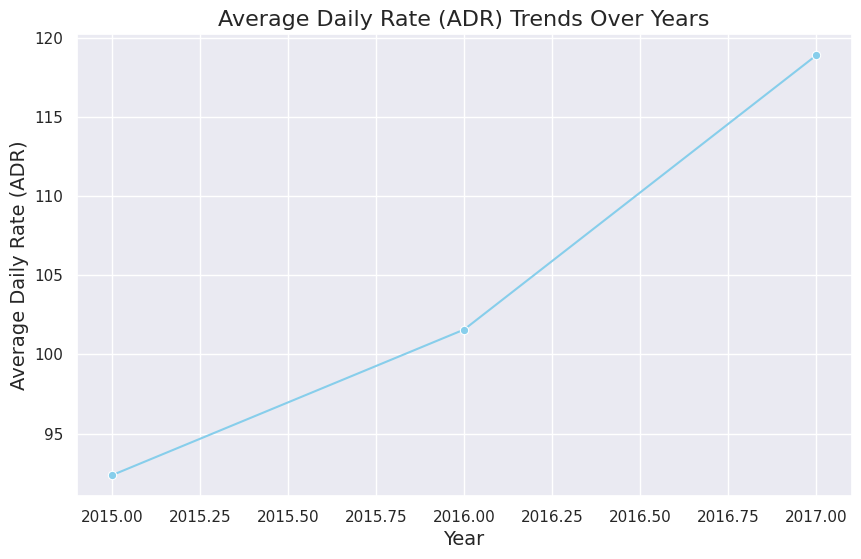

In [ ]:
# Group by year and calculate the average ADR
adr_trend_by_year = data.groupby('arrival_date_year').agg({'adr': 'mean'}).reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='arrival_date_year', y='adr', data=adr_trend_by_year,  marker='o', color='skyblue')

# Adding titles and labels
plt.title('Average Daily Rate (ADR) Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)

# Display the plot
plt.show()

#29. Number of Bookings per Month (Canceled vs. Non-Canceled)

Overview:
The line chart illustrates the monthly trend in bookings, comparing canceled and non-canceled bookings over a year.

Key Findings:

Overall Trend:
Both canceled and non-canceled bookings exhibit a similar seasonal pattern, with a peak in the summer months (June-August) and a decline towards the end of the year.
Canceled Bookings:

The number of canceled bookings fluctuates throughout the year, with peaks in certain months (e.g., July, August, September) and troughs in others (e.g., February, March, October).
Non-Canceled Bookings:

Non-canceled bookings show a more consistent pattern, with a steady increase from January to August followed by a gradual decline.
Interpretation of Data:

Seasonal Patterns:
The similar seasonal patterns for both canceled and non-canceled bookings suggest that factors like weather, holidays, or events might influence booking behavior.
Cancellation Factors: The fluctuations in canceled bookings indicate that certain months or periods might have higher cancellation rates.

Booking Trends:

The consistent increase and decline in non-canceled bookings reflect the overall booking trend throughout the year.

Actionable Insights:

Cancellation Prevention:

Identifying the months with higher cancellation rates can help hotels implement strategies to reduce cancellations, such as offering flexible booking policies or providing personalized support.

Seasonal Pricing:

Understanding the seasonal patterns can help hotels optimize pricing strategies to capitalize on peak demand and incentivize bookings during off-peak periods.
Operational Planning: The analysis can inform operational planning, such as staffing and resource allocation, to accommodate seasonal fluctuations in bookings.
Overall, the line chart provides valuable insights into the relationship between cancellation status and monthly booking trends, enabling hotels to make data-driven decisions and improve their operations.

<ipython-input-77-4a289996088f>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



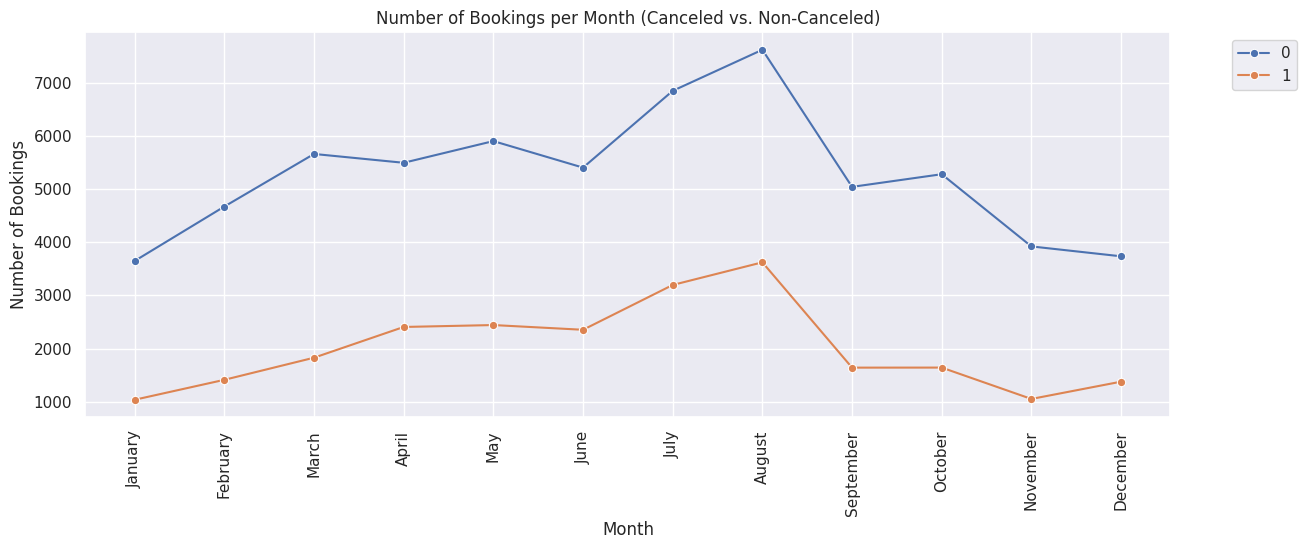

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
# Create a DataFrame with booking status per month
monthly_bookings = data.groupby(['arrival_date_month', 'is_canceled']).size().reset_index(name='booking_count')

sns.set_theme(style="darkgrid")
palette = sns.color_palette("Set2", 2)

# Plot a line chart with hue for canceled vs. non-canceled bookings
sns.lineplot(
    data=monthly_bookings,
    x='arrival_date_month',
    y='booking_count',
    hue='is_canceled',
    marker='o'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Month (Canceled vs. Non-Canceled)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#30.  Distribution of the adr variable across different hotels and whether the booking was canceled.

Analysis of Average ADR by Hotel Type and Cancellation Status Overview: The bar chart illustrates the distribution of the adr (average daily rate) variable across two hotel types (City Hotel and Resort Hotel) and whether the booking was canceled (0 for not canceled, 1 for canceled).

Key Findings:

Hotel Type: City Hotels have a slightly lower average ADR compared to Resort Hotels. Cancellation Status:

For both hotel types, canceled bookings (Cancellation Status = 1) tend to have slightly higher average ADRs than non-canceled bookings (Cancellation Status = 0).

Interpretation of Data:

Pricing Strategy: The difference in average ADR between City Hotels and Resort Hotels suggests that the two hotel types might have different pricing strategies or target different customer segments.

Cancellation Factors:

The slightly higher ADR for canceled bookings could indicate that factors associated with higher-priced bookings might also increase the likelihood of cancellations.

Actionable Insights:

Pricing Optimization: Hotels can analyze the factors influencing ADR for canceled bookings to identify opportunities for pricing optimization and reduce cancellations.

Customer Segmentation:

Understanding the differences in average ADR between hotel types can help hotels tailor their marketing and service offerings to specific customer segments. Overall, the bar chart provides valuable insights into the relationship between hotel type, cancellation status, and average daily rate, enabling hotels to make data-driven decisions and improve their revenue management strategies.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



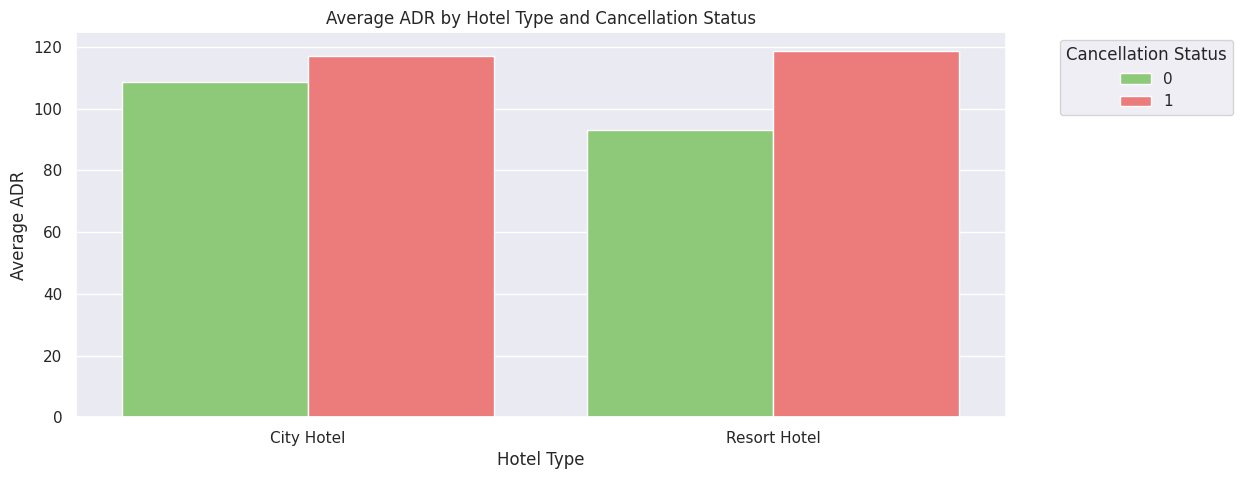

In [ ]:
# Group data by hotel and is_canceled, then calculate mean adr
adr_by_hotel_cancellation = data.groupby(['hotel', 'is_canceled']).agg({'adr': 'mean'}).reset_index()

# Set a color palette (e.g., "coolwarm", "viridis", "Set2", etc.)
palette = sns.color_palette("Set2", 2)  # Adjust the palette to your preference

palette = ['#88D66C', '#FF6969']
# Plotting the clustered bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x="hotel", y="adr", hue="is_canceled", data=adr_by_hotel_cancellation, palette=palette)

# Move the legend outside the plot
plt.legend(title='Cancellation Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Labels and title
plt.title('Average ADR by Hotel Type and Cancellation Status')
plt.xlabel('Hotel Type')
plt.ylabel('Average ADR')

plt.show()

# Multivariate Analysis

# 31. Pairplot: Relationship between lead_time, adr, total_duration, and total_guest

Analysis of the Pairplot: Relationships Between Lead Time, ADR, Total Duration, and Total Guest

Overview:

The pairplot provides a comprehensive visual representation of the relationships between the variables lead_time, adr, total_duration, and total_guest, along with their distributions and relationships with the categorical variables hotel and is_canceled.

Key Observations:

Lead Time and ADR:

The scatter plot shows a weak positive correlation between lead_time and adr, suggesting that bookings made further in advance might have slightly higher average daily rates. The distribution of lead_time is skewed to the right, indicating that a majority of bookings are made within a shorter lead time. The distribution of adr is also skewed to the right, with a concentration of bookings at lower ADRs.

Total Duration and ADR:

The scatter plot reveals a weak negative correlation between total_duration and adr, suggesting that longer stays might be associated with slightly lower ADRs. The distribution of total_duration is concentrated around shorter stays, with a few outliers for longer durations.

Total Guest and ADR:

The scatter plot indicates a slight positive correlation between total_guest and adr, suggesting that larger groups might be associated with slightly higher ADRs. The distribution of total_guest is skewed to the right, with a majority of bookings involving smaller groups. Relationships with Hotel Type and Cancellation Status: The color-coded scatter plots show that lead_time, adr, and total_duration have different distributions for Resort Hotel and City Hotel. The is_canceled variable appears to have some influence on the distributions of lead_time, adr, and total_duration, suggesting that cancellations might be associated with certain booking characteristics. Interpretation of Data:

Booking Patterns:

The pairplot reveals insights into common booking patterns, such as the relationship between lead time, ADR, and booking duration. Customer Preferences: The distributions of variables like total_guest and total_duration provide insights into customer preferences and booking behaviors.

Hotel-Specific Factors:

The differences in distributions for Resort Hotel and City Hotel suggest that hotel type might influence booking characteristics. Cancellation Factors: The relationship between is_canceled and other variables might indicate factors that contribute to cancellations. Actionable Insights:

Pricing Strategies:

Understanding the relationship between lead time, ADR, and total duration can help hotels optimize their pricing strategies to maximize revenue. Targeted Marketing: The insights from the pairplot can be used to identify specific customer segments and tailor marketing efforts accordingly. Operational Efficiency: Analyzing the distributions of variables like total_guest and total_duration can help hotels optimize their operations and resource allocation. Overall, the pairplot provides a comprehensive understanding of the relationships between lead time, ADR, total duration, and total guest, enabling hotels to make data-driven decisions and improve their business strategies.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

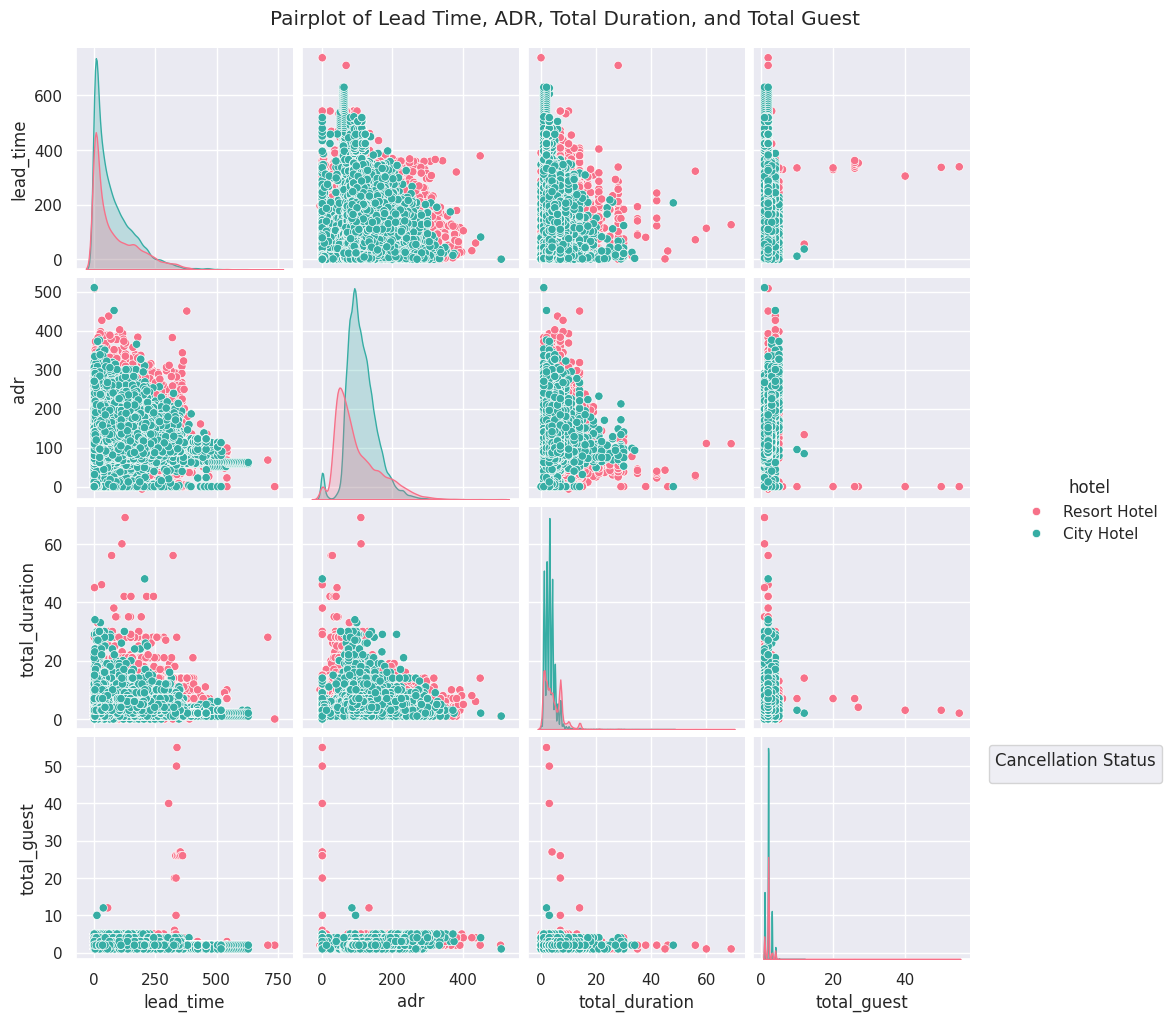

In [ ]:
# Selecting specific numerical columns for the pairplot
pairplot_columns = ['lead_time', 'adr', 'total_duration', 'total_guest']

# Creating the pairplot
sns.pairplot(data[pairplot_columns + ['hotel']], diag_kind='kde',hue = 'hotel', palette='husl')

# Move the legend outside the plot
plt.legend(title='Cancellation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title to the entire plot
plt.suptitle('Pairplot of Lead Time, ADR, Total Duration, and Total Guest', y=1.02)
plt.show()


#32.  Heatmap

Conclusion of the Correlation Heatmap:

The correlation heatmap provides valuable insights into the relationships between various variables related to hotel bookings:


Cancellation and Lead Time:
 There is a weak positive correlation (0.18) between cancellation status and lead time, suggesting that longer lead times may be slightly associated with a higher likelihood of cancellations.


Arrival Date Factors:
The variables related to arrival dates (year, week number, and day of the month) show varying correlations with cancellation status and other booking metrics. Notably, the arrival date week number has a moderate negative correlation (-0.51) with total duration, indicating that bookings during certain weeks might tend to have shorter stays.


Total Duration and Guests:
There is a strong positive correlation (0.95) between total duration and total guests, implying that longer stays are often associated with larger groups.


Average Daily Rate (ADR):
The ADR shows a weak positive correlation with total guest (0.13) and lead time (0.18), suggesting that bookings with more guests or made further in advance might have slightly higher daily rates.


Previous Cancellations and Bookings:
A notable correlation (0.44) exists between previous cancellations and the cancellation status, indicating that customers with a history of cancellations may be more likely to cancel again.


Required Car Parking Spaces:
The correlation (-0.18) between the required car parking spaces and cancellation status suggests that bookings requiring parking may be less likely to be canceled.


Overall, the heatmap highlights key relationships that can inform hotel management strategies, such as pricing, marketing, and operational adjustments to enhance customer retention and minimize cancellations. Further analysis can be conducted to explore these correlations more deeply and develop targeted interventions.

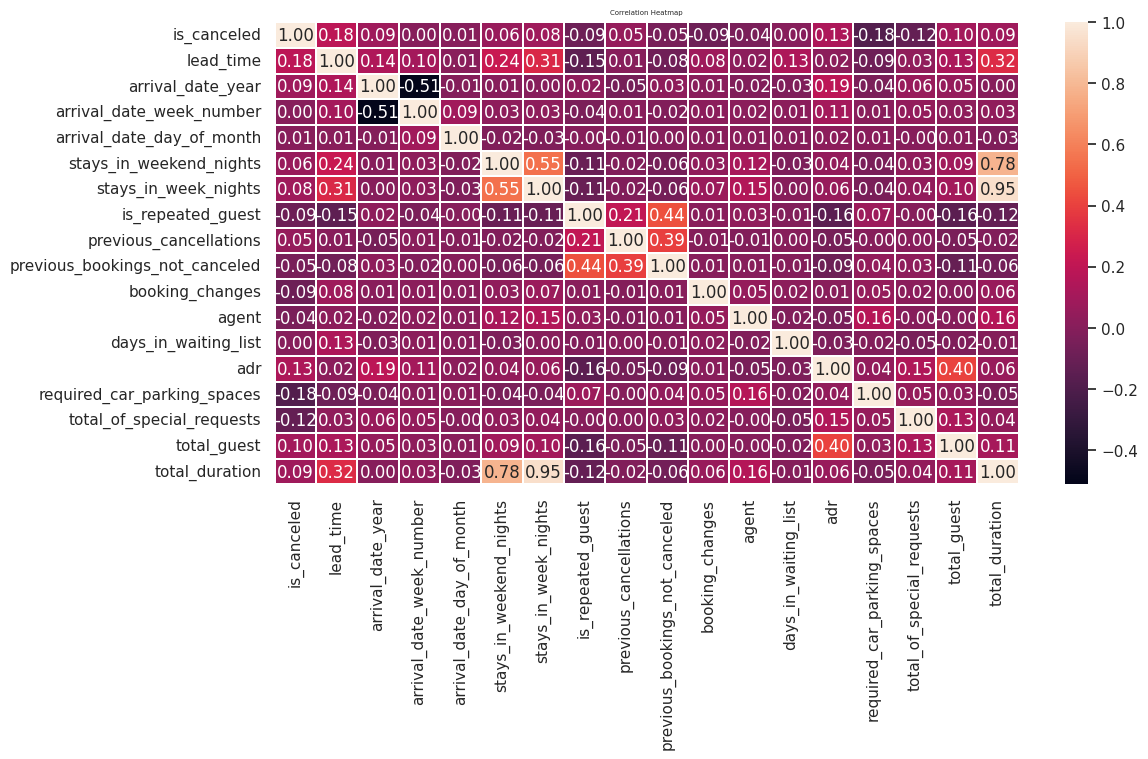

In [ ]:
# Filter out non-numerical columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.1)

# Adding titles and labels
plt.title('Correlation Heatmap', fontsize=5)
plt.show()

# Solution to Business Objective

#### What do you suggest the client to achieve Business Objective ?
here are several recommendations and suggestions for the client to achieve their business objectives:

### **Optimize Pricing Strategies**:

Utilize lead time information to implement dynamic pricing strategies.
Consider offering discounts for early bookings or promotions for last-minute bookings.
Analyze ADR variations across months and adjust pricing accordingly.

### **Customer Segmentation**:

Identify and target high-value customer segments with personalized marketing strategies.
Tailor services, amenities, and promotional campaigns based on the preferences of different market segments.
### **Cancellation Management:**

Implement strategies to manage and reduce cancellations, especially for bookings with longer lead times.
Explore incentives for non-refundable bookings to decrease cancellation rates.
Operational Efficiency:

Analyze booking distribution across different market segments and distribution channels.
Optimize inventory and staffing based on peak booking periods and market preferences.
### **Marketing and Promotions:**

Focus marketing efforts on key markets and regions with high visitor counts.
Consider culturally tailored promotions to enhance customer experience and satisfaction.
### **Seasonal Offerings:**

Introduce seasonal offerings or promotions to attract visitors during specific months with high ADR fluctuations.
Align marketing campaigns with the identified seasonal patterns in bookings.
Enhance Customer Loyalty:

Identify frequent guests and implement loyalty programs to encourage repeat bookings.
Personalize services for returning customers to enhance their overall experience.
### **Booking Flexibility:**

Evaluate the impact of booking changes on cancellations and adjust policies accordingly.
Provide flexibility for customers to modify bookings, potentially reducing cancellations.
### **Data-Driven Decision-Making:**

Continue leveraging data analysis for informed decision-making.
Regularly update strategies based on changing customer behavior and market trends.
### **Collaboration with Online Travel Agents (OTAs):**

Strengthen partnerships with OTAs and explore collaborative promotions.
Monitor and optimize the distribution channel mix for maximum reach.
These recommendations aim to align business strategies with the identified insights from the data analysis, ultimately contributing to increased revenue, improved customer satisfaction, and enhanced operational efficiency.

# Conclusions :

1. **Objective of EDA:**
   - Conducted a comprehensive Exploratory Data Analysis (EDA) on the hotel booking trend dataset.

2. **Key Findings:**
   - Unveiled crucial patterns and insights for strategic decision-making in the hospitality industry.

3. **Cancellations Management:**
   - Strongly recommends implementing a minimum deposit policy to minimize cancellations.
   - High cancellation rates observed when no deposits are taken.

4. **Customer Segmentation:**
   - Emphasizes the importance of understanding customer segmentation.
   - Transient customers exhibit higher cancellation rates.
   - Recommends offering group booking incentives to reduce cancellations and enhance loyalty.

5. **Seasonal Trends:**
   - Indicates peak booking months from May to August.
   - Suggests introducing special offers during off-peak seasons to attract more bookings and maximize revenue.

6. **Geographical Targeting:**
   - Highlights Western European countries (Portugal, France, and the UK) as major contributors to bookings and revenue.
   - Advises a targeted marketing approach towards these regions for increased customer acquisition.

7. **Strategic Decision-Making:**
   - Positions the EDA as a robust foundation for strategic decision-making.
   - Implementation of insights can drive positive business outcomes.

8. **Client Benefits:**
   - Positions the client for increased revenue, improved customer satisfaction, and operational excellence.
   - Stresses continuous monitoring and adaptation to changing market conditions for sustained success.

9. **Roadmap for Industry:**
   - Offers insights as a roadmap for the hotel industry to navigate evolving trends.
   - Emphasizes the importance of staying ahead in a competitive landscape through continuous adaptation.